# Import required packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import cm
import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict


# Import required packages
import numpy as np
import pandas as pd
import plotly_express as px


from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr
from astropy import constants
from astropy import units as u
from astropy import units
from datetime import timedelta, datetime
from astropy.time import Time
from astropy.io import ascii




%matplotlib inline
%config InlineBackend.figure_format='svg'




In [2]:
import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]

#print(font_names)


## font_size_axes_width

In [3]:
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

## cosmo

In [4]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy import constants as c
import astropy

from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
#cosmo=FlatLambdaCDM(H0=70, Om0=0.27)
D_cm_cosmo=cosmo.luminosity_distance(z=0.042436).to(u.cm)
D_cm=176*u.Mpc.to(u.cm)*u.cm
BH_mass=10**7.84*u.solMass
Ledd=1.26*10**38*BH_mass/u.solMass
#Cosmology-Corrected Quantities [Ho =  73.00 km/sec/Mpc, Ωmatter =   0.27, Ωvacuum =   0.73]




In [ ]:
Luminosity Distance        : 176 Mpc      (m-M) = 36.23 mag

FlatLambdaCDM?

cosmo
set the cosmology
Set the cosmology used (i.e., $H_0$, $q_0$, and $\Lambda_0$).

Syntax:	cosmo	<$H_0$><$q_0$><$\Lambda_0$>
where <$H_0$> is the Hubble constant in km/s/Mpc, <$q_0$> is the deceleration parameter, and <$\Lambda_0$> is the cosmological constant. If the cosmological constant is non-zero then at present XSPEC requires that the universe is flat. In this case the value of <$q_0$> will be ignored and XSPEC will assume that $\Omega_{matter}\geq 1-\Lambda_0$. The default values are <$H_0$> = 70, <$q_0$> = 0.0, and <$\Lambda_0$> = 0.73

In [ ]:
D_cm,D_cm.to(u.Mpc),D_cm_cosmo,D_cm_cosmo.to(u.Mpc)

In [ ]:
Ledd

In [ ]:
cosmo.luminosity_distance(z=0.042436).to(u.Mpc)

In [ ]:
D_cm.to(u.Mpc)

# define

## axis

In [5]:
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
    
def fluxtoeddrate(x):
    y = 4*np.pi*D_cm.value**2*x/Ledd
    return y

def eddratetoflux(x):    
    y = x*Ledd*(4*np.pi*D_cm.value**2)**(-1)
    return y     

## convert time

In [ ]:
convert_xaxis_mjd(datetime(2009, 1, 22, 0, 0))

In [ ]:
convert_xaxis_mjd(datetime(2013, 1, 1, 0, 0))

In [ ]:
convert_xaxis_mjd(datetime(2015, 1, 11, 0, 0))

In [ ]:
convert_xaxis_time(57000),convert_xaxis_time(56450),convert_xaxis_time(56350)

In [6]:
def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y

def date2mjd(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - 678576
    return y

def mjd2date(x):
    y= x + 678576
    return y



def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate



## data model fit

In [7]:
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling import models,fitting
from astropy.modeling.models import custom_model
from scipy.optimize import least_squares,curve_fit
from scipy.stats import f
import os

def linear(x,k,b):#linear
    return k*x+b

def broken_linear_curve(x,k1,k2,x0,b1,b2):#two lines divided by x0
    return np.where(x<x0,k1*x+b1,k2*x+b2)    

def broken_linear_curve_dot(x,k1,k2,x0,y0):#connect by x0,y0
    return np.where(x<x0,k1*(x-x0)+y0,k2*(x-x0)+y0) 

def power_law(x,S0,alpha):
    return S0*x**alpha



def alpha_calc(x,y):
    popt,pcov=curve_fit(power_law,x,y,p0=(10,0.5))
    S0=popt[0]
    alpha=popt[1]
    alpha_err=np.sqrt(np.diag(pcov))[1]
    return S0,alpha,alpha_err

def linear_calc(x,y):#linear_parameter
    popt,pcov=curve_fit(linear,x,y,p0=(1,1))
    return popt[0],popt[1]

def broken_linear_curve_calc(x,y):
    param_bounds=([-np.inf,0,-4,-np.inf,-np.inf],[-0,np.inf,-2.5,np.inf,np.inf])
    popt,pcov=curve_fit(broken_linear_curve,x,y,p0=(-1.5,1.5,-2.7,2,-1.5),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    b1=popt[3]
    b2=popt[4]
    return k1,k2,x0,b1,b2

def broken_linear_curve_dot_calc(x,y):
    param_bounds=([-np.inf,0,-3.5,0],[0,np.inf,-2.5,2])
    popt,pcov=curve_fit(broken_linear_curve_dot,x,y,p0=(-1.5,1.5,-2.7,1),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    y0=popt[3]
    return k1,k2,x0,y0


def decay_e_timescale(t,tau,S0):
    logey=-t/tau+S0
    return logey
#logy=-(x-x[0])/tau+S0

def decay_e_timescale_calc(x,y,tau_test=1000,S0_test=1):
    logey=np.log(y)
    param_bounds=([0,-np.inf],[np.inf,np.inf])
    popt,pcov=curve_fit(decay_e_timescale,x,logey,p0=(tau_test,S0_test),bounds=param_bounds)
    tau=popt[0]
    S0=popt[1]    
    return tau,S0


def exp_timescale(t,Tr,Tf,tp,S0):
    logey=-(np.exp((tp-t)/Tr)+np.exp((t-tp)/Tf))+S0
    return logey


def exp_timescale_calc(x,y,Tr_test=10000,Tf_test=2000,tp_test=50000,S0_test=1):
    logey=np.log(y)
    param_bounds=([1,1,45700,-np.inf],[np.inf,np.inf,58300,np.inf])
    popt,pcov=curve_fit(exp_timescale,x,logey,p0=(Tr_test,Tf_test,tp_test,S0_test),bounds=param_bounds)
    Tr=popt[0]
    Tf=popt[1]
    tp=popt[2] 
    S0=popt[3]    
    return Tr,Tf,tp,S0


# define label

## marker_color

markers_pd=['*','.','+','d','h','v','^','x','>','1','2','3','4','8','p','P','<','H','X','D','|','_']
colors_pd=['red','green','blue','yellow','lightblue','cyan','tan','gold','sandybrown','olivedrab','chartreuse','darkgreen','m','skyblue','violet','crimson','purple','magenta','lime','turquoise','lightcyan','teal','indigo']

In [ ]:
colors_cm_10 = cm.get_cmap('tab10', 10)
for i in range(5):
    plt.plot(i,i,marker='o',color=colors_cm_10(i))

In [ ]:
for i in range(10):
    plt.plot(i,i,marker='o',color=colors_cm_10(i))    

In [ ]:
'{:.3e}'.format((constants.c/(2500*units.AA)).to(u.Hz).value)

## label_xy_axis

In [ ]:
label_L_bol=r'$L_{bol}$'
label_L_bol_rate=r'$L_{bol}/L_{Edd}$'

label_F_2_10=r'$F_{2-10\,keV}\mathregular{(erg\,cm^{-2}\,s^{-1})}$'
label_L_2_10_rate=r'$L_{2-10\,keV}/L_{Edd}$'


label_F_2=r'$F_{2\,keV}\mathregular{(erg\,cm^{-2}\,Hz^{-1}\,s^{-1})}$'
label_nuF_2=r'$\nu F_{2\,keV}\mathregular{(erg\,cm^{-2}\,s^{-1})}$'
label_nuL_2_rate=r'$\nu L_{2\,keV}/L_{Edd}$'

label_alpha_ox=r'$\alpha_{OX}$'
label_F_uv_mjy=r'$F_{UV}\mathregular{(mjy)}$'
label_F_uv=r'$F_{UV}\mathregular{(erg\,cm^{-2}\,Hz^{-1}\,s^{-1})}$'
label_nuF_uv=r'$\nuF_{UV}\mathregular{(erg\,cm^{-2}\,s^{-1})}$'
label_nuL_uv_rate=r'$\nu L_{UV}/L_{Edd}$'

label_mjd=r'$\mathregular{MJD}$'
label_Fint=r'$\mathregular{F_{int}}$ $\mathregular{(mJy)}$'




## band_instrument_frequency

In [8]:
nu_uuu=(constants.c/(3465*units.AA)).to(u.Hz).value
nu_uw1=(constants.c/(2600*units.AA)).to(u.Hz).value
nu_um2=(constants.c/(2246*units.AA)).to(u.Hz).value
nu_uw2=(constants.c/(1928*units.AA)).to(u.Hz).value

uvot_bands=['uuu','uw1','um2','uw2']
uvot_bands_label=['U','UVW1','UVM2','UVW2']

colors_cm_10 = cm.get_cmap('tab10', 10)
colors_band=[colors_cm_10(0),colors_cm_10(2),colors_cm_10(3),colors_cm_10(4)]
markers_4bands=['^','o','*','p',]
markers_bands=['^','o','*','p',]

nu_uvot_bands=[nu_uuu,nu_uw1,nu_um2,nu_uw2]
lambda_uvot_bands=[3465,2600,2246,1928]

marker_dict_uv = dict(zip(uvot_bands, markers_bands))
color_dict_uv = dict(zip(uvot_bands, colors_band))
label_dict_uv= dict(zip(uvot_bands, uvot_bands_label))

instrument_label=['XMM-Newton','Chandra','NuSTAR','Swift','Suzaku']
instrument=['X','C','N','S','Su']
markers_ins=['^','*','p','o','X']
corlors_ins=[colors_cm_10(0),colors_cm_10(2),colors_cm_10(3),colors_cm_10(4),colors_cm_10(9)]
marker_dict_ins = dict(zip(instrument, markers_ins))
color_dict_ins= dict(zip(instrument, corlors_ins))
instrument_dict= dict(zip(instrument, instrument_label))

# importdata

## UVOT

In [9]:
import extinction
#wave1=np.array([2246,3465,2600,1928])# m2,u,w1,w2
wave2=np.array([3465,2600,2246,1928])# u,w1,m2,w2
extinction_Noda=extinction.fm07(wave2, 0.113, unit='aa')# Noda 2018
print(extinction_Noda)

[0.18014664 0.25066752 0.35475777 0.31093384]


In [10]:
dataroot_dir='/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/'
uvot_uuu=pd.read_csv('%s/uvot_uuu_sum.csv'%dataroot_dir,sep='|',header=0)
uvot_uw1=pd.read_csv('%s/uvot_uw1_sum.csv'%dataroot_dir,sep='|',header=0)
uvot_um2=pd.read_csv('%s/uvot_um2_sum.csv'%dataroot_dir,sep='|',header=0)
uvot_uw2=pd.read_csv('%s/uvot_uw2_sum.csv'%dataroot_dir,sep='|',header=0)
uvot_band_data=[uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]

#wave1=np.array([2246,3465,2600,1928])# m2,u,w1,w2
#wave2=np.array([3465,2600,2246,1928])# u,w1,m2,w2

for index,(d,f,b,l) in enumerate(zip(uvot_band_data,nu_uvot_bands,uvot_bands,lambda_uvot_bands)):
    print(index,b,l,' A ',f,' Hz ')
    d.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
    d['flux']=d['mjy']*1.0e-26
    d['ferr']=d['mjy_err']*1.0e-26
    d['band']=b
    d['frequency']=f
    d['mag_ext_cor']=d['mag']-extinction_Noda[index]
    d['logf_ext_cor']= (-48.6-d['mag_ext_cor'])/2.5
    d['flux_ext_cor']=10**d['logf_ext_cor']
    d['nu_f_uv']=d['flux_ext_cor']*f
    d['nu_f_uv_err']=d['ferr']*f    
    d['mjy_ext_cor']=d['flux_ext_cor']*1.0e26
    
uvdata_dict=dict(zip(uvot_bands, uvot_band_data))    

0 uuu 3465  A  865201898989898.9  Hz 
1 uw1 2600  A  1153047915384615.0  Hz 
2 um2 2246  A  1334783873552982.8  Hz 
3 uw2 1928  A  1554940134854771.5  Hz 


In [ ]:
uvot_uw1['mjd'][0]

In [ ]:
uvot_uw1[abs(uvot_uw1['mjd']-53587)<1]['mjy'].values

In [ ]:
uvot_uw1[abs(uvot_uw1['mjd']-57429)<1]['mjy'].values

In [ ]:
uvot_uw1[abs(uvot_uw1['mjd']-53587)<1]['mjy'].values/uvot_uw1[abs(uvot_uw1['mjd']-57429)<1]['mjy'].values

## UVOT_bands_data

In [11]:
uvotalldata=pd.concat([uvot_uuu,uvot_uw1,uvot_um2, uvot_uw2],ignore_index=True)
uvotalldata=uvotalldata.reset_index(drop=True)

In [ ]:
uvotalldata[abs(uvotalldata['mjd']-56450)<1]['flux'],uvotalldata[abs(uvotalldata['mjd']-56450)<1]['band'],

In [ ]:
uvotalldata[abs(uvotalldata['mjd']-56352)<1]['flux'],uvotalldata[abs(uvotalldata['mjd']-56352)<1]['band']

In [ ]:
for b_,i,j, in zip(uvotalldata[abs(uvotalldata['mjd']-56352)<1]['band'],uvotalldata[abs(uvotalldata['mjd']-56450)<1]['flux'],uvotalldata[abs(uvotalldata['mjd']-56352)<1]['flux']):
    print(b_,i/j)

## XRAY

In [12]:
datazy1=pd.read_csv('%s/xrt_fit_zyan_v1.txt'%dataroot_dir,header=0,sep=' ')
datazy1=(datazy1.sort_values('obs_time'))
datazy1.columns=['obsid', 'mjd', 'gamma', 'gamma_lo', 'gamma_up', 'flux',
       'xflux_lo', 'xflux_up', 'chi']
datazy1['ins']='S'
datazy1['ref']='zyan'
datazy1['gerr']=(datazy1['gamma_lo']+datazy1['gamma_up'])/2
datazy1['ferr']=(datazy1['xflux_lo']+datazy1['xflux_up'])/2

paperdataMrk1018=pd.read_excel('%s/Mrk1018_xray_except_XRT.xlsx'%dataroot_dir,sheet_name='Sheet1',index=None)
data_paper=paperdataMrk1018[paperdataMrk1018['mjd'].notnull()]
data_paper['flux']=data_paper['flux2-10keV(e-11)'].map(lambda x: x*1e-11)
data_paper['ferr']=data_paper['Ferr2-10'].map(lambda x: x*1e-11)
data_paper=(data_paper.sort_values('mjd'))


data_paper['edd_rate']=4*np.pi*D_cm.value**2*data_paper['flux']/Ledd
data_paper['er_err']=4*np.pi*D_cm.value**2*data_paper['ferr']/Ledd
datazy1['edd_rate']=4*np.pi*D_cm.value**2*datazy1['flux']/Ledd
datazy1['er_err']=4*np.pi*D_cm.value**2*datazy1['ferr']/Ledd

## RADIO

In [14]:
radioMrk1018_rescale=pd.read_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/Mrk1018radiolc_rescale.csv')
radioMrk1018=pd.read_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/Mrk1018radio_data.csv')

In [ ]:
radioMrk1018.columns,radioMrk1018_rescale.columns

## bokeh_data

In [15]:
# Store the data in a ColumnDataSource
radio_bokeh = (radioMrk1018.loc[:, ['meanmjd', 'mjderr', 'Fint(mJy)', 
                                    'Ferr','frequency','band']].sort_values('meanmjd'))

radio_rescale_bokeh = (radioMrk1018_rescale.loc[:, ['meanmjd', 'mjderr', 
                                    'scaled_flux', 'scaled_rms',
                                   'C_alpha','band']].sort_values('meanmjd'))


uvot_bokeh = (uvotalldata.loc[:, ['mjd', 'frequency',
                           'band',                     
                           'flux_ext_cor','ferr','nu_f_uv','nu_f_uv_err']]
                  .sort_values('mjd'))

xray_paper_bokeh = (data_paper.loc[:, ['mjd', 'obsid',
                           'ins','gamma',                           
                           'flux','ref','edd_rate','ferr','gerr','chi','er_err']]
                  .sort_values('mjd'))                              

datazy1_bokeh=(datazy1.loc[:, ['mjd', 'obsid',
                           'ins','flux','gamma',                           
                           'edd_rate','ferr','gerr','chi','er_err']]
                  .sort_values('mjd')) 

xray_paper_bokeh['ref'] = xray_paper_bokeh['ref'].astype(str)    
uvot_bokeh['band'] = uvot_bokeh['band'].astype(str) 


## X-ray_good_select

In [16]:
############################################################
xrtfit_fluxgood=datazy1[datazy1['chi']<1.5]
xrtfit_fluxgood=xrtfit_fluxgood[xrtfit_fluxgood['chi']>=0.7]
xray_append=pd.concat([xrtfit_fluxgood,xray_paper_bokeh],ignore_index=True).sort_values('mjd')
xray_append['Lx']=4*np.pi*D_cm.value**2*xray_append['flux']
xray_append=xray_append.reset_index(drop=True)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [ ]:
(xray_append.loc[:, ['mjd', 'obsid', 'ins','chi','gamma','gerr','flux','ferr',]]
                  .sort_values('mjd'))

In [17]:
xray_append_latex=(xray_append.loc[:, ['mjd', 'obsid', 'ins','chi','gamma','gerr','flux','ferr',]]
                  .sort_values('mjd'))
xray_append_latex['flux']=xray_append_latex['flux']*10**12
xray_append_latex['ferr']=xray_append_latex['ferr']*10**12
xray_append_latex.to_excel('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/Mrk1018_Xraydata_append.xlsx')

In [ ]:
xray_append_latex

# columns infomation

In [ ]:
xray_append.columns

In [ ]:
uvot_uw1.columns

In [ ]:
radioMrk1018.columns

# F_2keV

In [ ]:
v_1keV=2.418e17 #Hz
v_2keV=2.418e17*2 #Hz
print('{:.3e}'.format(v_2keV))

In [ ]:
np.log10(v_2keV)-np.log10(nu_uw1)

In [ ]:
1/(np.log10(v_2keV)-np.log10(nu_uw1))

In [18]:
#A(E)\prop v^{-\Gamma} #photon index
#Fv \prop v^{-\alpha}  #spectral index
#\alpha=\Gamma -1
v_1keV=2.418e17 #Hz
v_2keV=2.418e17*2 #Hz
alpha_goodfit=xray_append['gamma']-1
xray_append['F_2keV']=xray_append['flux']*(1-alpha_goodfit)/(5**(1-alpha_goodfit)-1)/v_2keV
xray_append['F_4keV']= 2**(-alpha_goodfit)*xray_append['F_2keV']
xray_append['F_6keV']= 3**(-alpha_goodfit)*xray_append['F_2keV']
xray_append['F_8keV']= 4**(-alpha_goodfit)*xray_append['F_2keV']
xray_append['F_10keV']= 5**(-alpha_goodfit)*xray_append['F_2keV']

# lightcurve multiband

## X-ray

In [ ]:
fig = plt.figure(figsize=(12, 6))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

for i in range(len(xray_append)):
    label=xray_append.iloc[i]['ins']
    ins_label=instrument_dict[label]
    marker=marker_dict_ins[label] 
    color=color_dict_ins[label] 
    ax.errorbar(xray_append.iloc[i]['mjd'],
                 xray_append.iloc[i]['flux'],yerr=xray_append.iloc[i]['ferr'],
                 fmt='o',c=color,linestyle=None,marker=marker,label=ins_label)

    
xrtdata_selction=xray_append[xray_append['mjd']<57033]
xrtdata_selction=xrtdata_selction[abs(xrtdata_selction['mjd']-56450)>2]
t_xray=xrtdata_selction['mjd']
f_xray=xrtdata_selction['flux']
xfit_xrt=np.linspace(53000,57033)
tau,S0=decay_e_timescale_calc(t_xray,f_xray,tau_test=2000,S0_test=1)
print(tau,S0)
logey=decay_e_timescale(xfit_xrt,tau,S0)
yfit_xrt=np.exp(logey)

ax.plot(xfit_xrt,yfit_xrt,alpha=0.3,color=colors_cm_10(0))
ax.text(54500, 0.4e-11, r'$F \propto e^{-t/%d}$'%tau, fontsize=18,color=colors_cm_10(0))

  
xrtdata_selction=xray_append[xray_append['mjd']<57033+1]
xrtdata_selction=xrtdata_selction[xrtdata_selction['mjd']>54853-1]
xrtdata_selction=xrtdata_selction[abs(xrtdata_selction['mjd']-56450)>2]

t_xray=xrtdata_selction['mjd']
f_xray=xrtdata_selction['flux']
xfit_xrt=np.linspace(54853,57033) 
tau,S0=decay_e_timescale_calc(t_xray,f_xray,tau_test=2000,S0_test=1)
print(tau,S0)
logey=decay_e_timescale(xfit_xrt,tau,S0)
yfit_xrt=np.exp(logey)
ax.plot(xfit_xrt,yfit_xrt,alpha=0.3,color=colors_cm_10(1))    
ax.text(56000, 0.6e-11, r'$F \propto e^{-t/%d}$'%tau, fontsize=18,color=colors_cm_10(1))



# Add the x and y-axis labels


secax1 = ax.secondary_xaxis('top', functions=(mjd2date,date2mjd))
secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
secax1.xaxis.set_major_locator(mdates.DayLocator(interval=365*2))
secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=365))
secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.8),ncol=1,loc='right')    
ax.axvspan(56293,57033, facecolor='#2ca02c', alpha=0.2)
ax.semilogy() 

plt.subplots_adjust(hspace = 0.0)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)

time_left,time_right=(53000,59000)
ax.set_xlim(time_left,time_right)

## UVOT

In [ ]:
uvot_uw1.columns

In [ ]:
fig = plt.figure(figsize=(12, 6))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax2=fig.add_subplot(1,1,1)


for l,c,d,m in zip(uvot_bands_label,colors_band,uvot_band_data,markers_bands):
    ax2.errorbar(d['mjd'],d['flux_ext_cor']*1.0e26,yerr=d['ferr']*1.0e26,color=c,fmt='o',label=l,marker=m,linestyle=None)


for band,uf_,c_ in zip(uvot_bands,uvot_band_data,colors_band):
    data_selction=uf_[uf_['mjd']<57033]
    data_selction=data_selction[data_selction['mjd']>54628-1]
    t_uvot=data_selction['mjd']
    f_uvot=data_selction['flux_ext_cor']
    #ax2.scatter(t_xray,f_xray,label=band)
    xfit_uvot=np.linspace(54628,57033)
    tau,S0=decay_e_timescale_calc(t_uvot,f_uvot,tau_test=500,S0_test=1)
    print(band,':',tau)
    logy=decay_e_timescale(xfit_uvot,tau,S0)
    yfit_uvot=np.exp(logy)
    ax2.plot(xfit_uvot,yfit_uvot*1.0e26,color=c_,alpha=0.3)
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax2.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.8),ncol=1,loc='right')    
#ax1.set_xticks()
ax2.axvspan(56293,57033, facecolor='#2ca02c', alpha=0.2)
ax2.semilogy()
set_ax_tick(ax2)


## RADIO

## extended structure

### Mrk590

In [ ]:
D_cm_Mrk590=cosmo.luminosity_distance(z=0.0264).to(u.cm)
print(D_cm_Mrk590.to(u.Mpc))

In [ ]:
Luminosity Distance        : 107 Mpc      (m-M) = 35.15 mag

In [ ]:
extended_dis=D_cm_Mrk590*2*np.pi/(180*60*60)*u.cm.to(u.kpc)
extended_dis.value

In [ ]:
extended_dis=D_cm_Mrk590*6*np.pi/(180*60*60)*u.cm.to(u.kpc)
extended_dis.value

## Mrk1018_image_size

In [ ]:
extended_dis=D_cm*1*np.pi/(180*60*60)*u.cm.to(u.kpc)
extended_dis.value

In [ ]:
D_cm/D_cm_Mrk590

In [ ]:
radioMrk1018_rescale.columns

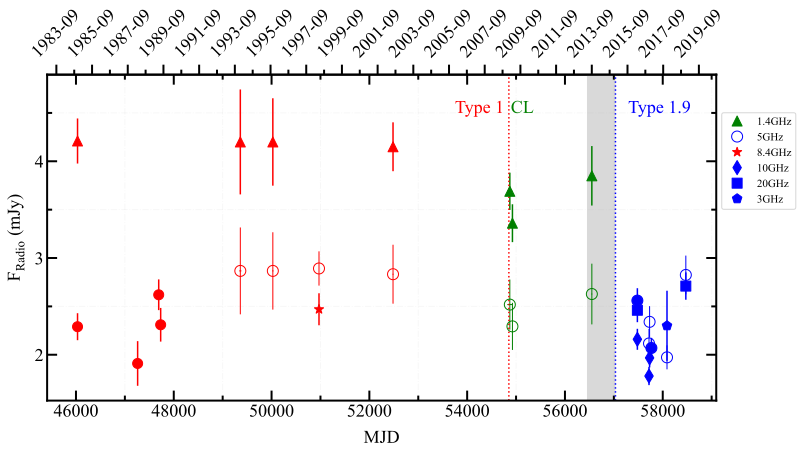

In [21]:
def get_namelist(df,name):
    state=df[name]
    stateori=[]
    for i in state:
        if i not in stateori:
            stateori.append(i)
    return stateori

parax='meanmjd'
paraxerr='mjderr'
paray='Fint(mJy)'
parayerr='Ferr'

paray1='scaled_flux'
parayerr1='scaled_rms'

parafreq='frequency'
paraband='band'
parabandlabel='GHz_label'

radio_freqlist=get_namelist(radioMrk1018,parafreq)
namelist=radio_freqlist
paralist=parafreq

#fig = plt.figure(figsize=(12, 6))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])

fig = plt.figure(figsize=(12, 6))
#fig.subplots_adjust(left=0.1, right=0.85, bottom=0.12, top=0.95)
ax3=fig.add_subplot(1,1,1)


totalradio_plot=radioMrk1018[radioMrk1018['GHz_label'].notnull()]
#filename=totalradio_plot

markers_freq_radio=['^','o','*','d','s','p']
paralabellist=get_namelist(totalradio_plot,parabandlabel)
marker_freq_dict = dict(zip(paralabellist, markers_freq_radio))

for i in np.arange(len(totalradio_plot['GHz_label'])):
    if totalradio_plot.iloc[i]['meanmjd']<=54853:
        color='r'
    elif totalradio_plot.iloc[i]['meanmjd']<=57033:
        color='g'
    else:
        color='b'
    marker=marker_freq_dict[totalradio_plot.iloc[i]['GHz_label']]
    ax3.errorbar(totalradio_plot.iloc[i]['meanmjd'],totalradio_plot.iloc[i]['Fint(mJy)'],
             xerr=totalradio_plot.iloc[i]['mjderr'],yerr=totalradio_plot.iloc[i]['Ferr'],
             marker=marker, color=color,markersize=10,mew=1,capsize=0,ls='',
            label=totalradio_plot.iloc[i]['GHz_label'])       
       

for i in np.arange(4,len(radioMrk1018_rescale['meanmjd'])):
    if radioMrk1018_rescale.iloc[i]['meanmjd']<=54853:
        color='r'
    elif radioMrk1018_rescale.iloc[i]['meanmjd']<=57033:
        color='g'
    else:
        color='b'   
    
    ax3.errorbar(radioMrk1018_rescale.iloc[i]['meanmjd'],radioMrk1018_rescale.iloc[i]['scaled_flux'],
        xerr=radioMrk1018_rescale.iloc[i]['mjderr'],yerr=radioMrk1018_rescale.iloc[i]['scaled_rms'],
            marker='o',ms=11., mew=1, capsize=0,mec=color,ecolor=color,
            elinewidth=1,fmt='o',ls='',fillstyle='none',label='5GHz')
#

set_ax_tick(ax3)    
set_ax_locator(ax3,2000,1000,1.0,0.5)
    
secax1 = ax3.secondary_xaxis('top', functions=(mjd2date,date2mjd))
secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
secax1.xaxis.set_major_locator(mdates.DayLocator(interval=365*2))
secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=365))
secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=45,)


#handles, labels = ax3.get_legend_handles_labels()
#hdl=[h[0] for h in handles]
#by_label = OrderedDict(zip(labels, hdl))  
#by_label = OrderedDict(zip(labels, handles))   



ax3.axvline(54853,color='r',linestyle=':')
#ax3.axvspan(56293,57033, facecolor='#2ca02c')
ax3.axvspan(56450,57033, facecolor='gray',alpha=0.3)
ax3.axvline(57033,color='b',linestyle=':')

ax3.text(54853-600,4.5,'Type 1',color='r',horizontalalignment='center')
ax3.text(56293-1400,4.5,'CL',color='g')
ax3.text(57033+900,4.5,'Type 1.9',color='b',horizontalalignment='center')


ax3.set_xlabel(r'$\mathregular{MJD}$', labelpad=10)
ax3.set_ylabel(r'$\mathregular{F_{Radio}}$ $\mathregular{(mJy)}$', labelpad=10)


handles, labels = ax3.get_legend_handles_labels()
# remove the errorbars
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax3.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.9),
          loc=2, numpoints=1,fontsize=11. )

mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2


plt.grid(alpha=0.1,which='minor', linestyle='-.', linewidth=1)
#plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/Mrk1018/subplots-radio-second_freq.png', dpi=400, transparent=False, bbox_inches='tight')
# Show figure
#plt.show()   


## multi-band-lc

In [ ]:
fig = plt.figure(figsize=(8, 12))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(3,1,1)
markersize=10

for i in range(len(xray_append)):
    label=xray_append.iloc[i]['ins']
    ins_label=instrument_dict[label]
    marker=marker_dict_ins[label] 
    if xray_append.iloc[i]['mjd']<=54853:
        color='r'
    elif xray_append.iloc[i]['mjd']<=57033:
        color='g'
    else:
        color='b' 
    #color=color_dict_ins[label] 
    ax.errorbar(xray_append.iloc[i]['mjd'],
                 xray_append.iloc[i]['flux'],yerr=xray_append.iloc[i]['ferr'],
                 fmt='o',color=color,marker=marker,label=ins_label,ms=markersize)

    
xrtdata_selction=xray_append[xray_append['mjd']<57033+1]
xrtdata_selction=xrtdata_selction[abs(xrtdata_selction['mjd']-56450)>2]
xrtdata_selction=xrtdata_selction[xrtdata_selction['mjd']>54628-1]

t_xray=xrtdata_selction['mjd']
f_xray=xrtdata_selction['flux']
xfit_xrt=np.linspace(54628,57033)
tau,S0=decay_e_timescale_calc(t_xray,f_xray,tau_test=2000,S0_test=1)
print(tau,S0)
logey=decay_e_timescale(xfit_xrt,tau,S0)
yfit_xrt=np.exp(logey)

ax.plot(xfit_xrt,yfit_xrt,alpha=0.8,color='g')
ax.text(54853, 0.1e-11, r'log $F \propto {-t/%d}$'%tau, fontsize=14,color='g')

  


# Add the x and y-axis labels
secax1 = ax.secondary_xaxis('top', functions=(mjd2date,date2mjd))

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.8),
          loc=2, numpoints=1,ncol=1, fontsize=11.)

#ax.axvspan(56293,57033, facecolor='#2ca02c', alpha=0.2)
ax.semilogy() 




# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax2=fig.add_subplot(3,1,2)


for l,c,d,m in zip(uvot_bands_label,colors_band,uvot_band_data,markers_bands):
    #ax2.errorbar(d['mjd'],d['flux_ext_cor']*1.0e26,yerr=d['ferr']*1.0e26,
                 #color=c,fmt='o',label=l,marker=m,linestyle=None,ms=markersize)

    
    for i in range(len(d['mjd'])):
        if d.iloc[i]['mjd']<=54853:
            color='r'
        elif d.iloc[i]['mjd']<=57033:
            color='g'
        else:
            color='b'  
        ax2.errorbar(d.iloc[i]['mjd'],d.iloc[i]['flux_ext_cor']*1.0e26,
                     yerr=d.iloc[i]['ferr']*1.0e26,color=color,
                     fmt='o',label=l,marker=m,linestyle=None,ms=markersize)


text_y_uvot=np.logspace(-0.3,-1.1,4)

for band,uf_,c_,y in zip(uvot_bands,uvot_band_data,colors_band,text_y_uvot):

    data_selction=uf_[uf_['mjd']<57033+1]
    data_selction=data_selction[abs(data_selction['mjd']-56450)>2]
    data_selction=data_selction[data_selction['mjd']>54628-1]
    
    t_uvot=data_selction['mjd']
    f_uvot=data_selction['flux_ext_cor']
    #ax2.scatter(t_xray,f_xray,label=band)
    xfit_uvot=np.linspace(54628,57033)
    tau,S0=decay_e_timescale_calc(t_uvot,f_uvot,tau_test=500,S0_test=1)
    print(band,':',tau)
    logy=decay_e_timescale(xfit_uvot,tau,S0)
    yfit_uvot=np.exp(logy)
    ax2.plot(xfit_uvot,yfit_uvot*1.0e26,color='green',alpha=0.8)    
    ax2.text(53200, y, r'%s: log $F \propto {-t/%d}$'%(label_dict_uv[band],tau), fontsize=14,color='g')
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.8),
          loc=2, numpoints=1,ncol=1, fontsize=11.)

#ax1.set_xticks()
#ax2.axvspan(56293,57033, facecolor='#2ca02c', alpha=0.2)
ax2.semilogy()





# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax3=fig.add_subplot(3,1,3)
#ax3.axvspan(56293,57033, facecolor='#2ca02c', alpha=0.2)

totalradio_plot=radioMrk1018[radioMrk1018['GHz_label'].notnull()]
#filename=totalradio_plot


   
'''for i in np.arange(len(totalradio_plot['GHz_label'])):
    if totalradio_plot.iloc[i]['meanmjd']<=54853:
        color='r'
    elif totalradio_plot.iloc[i]['meanmjd']<=57033:
        color='g'
    else:
        color='b'
    marker=marker_freq_dict[totalradio_plot.iloc[i]['GHz_label']]
    ax3.errorbar(totalradio_plot.iloc[i]['meanmjd'],totalradio_plot.iloc[i]['Fint(mJy)'],
             xerr=totalradio_plot.iloc[i]['mjderr'],yerr=totalradio_plot.iloc[i]['Ferr'],
             marker=marker, color=color,markersize=10,mew=1,capsize=0,ls='',
            label=totalradio_plot.iloc[i]['GHz_label'])  '''       

for i in np.arange(len(radioMrk1018_rescale['meanmjd'])):
    if radioMrk1018_rescale.iloc[i]['meanmjd']<=54853:
        color='r'
    elif radioMrk1018_rescale.iloc[i]['meanmjd']<=57033:
        color='g'
    else:
        color='b'   
    
    ax3.errorbar(radioMrk1018_rescale.iloc[i]['meanmjd'],radioMrk1018_rescale.iloc[i]['scaled_flux'],
        xerr=radioMrk1018_rescale.iloc[i]['mjderr'],yerr=radioMrk1018_rescale.iloc[i]['scaled_rms'],
            marker='o',ms=11., mew=1, capsize=0,mec=color,ecolor=color,
            elinewidth=2,fmt='o',ls='',fillstyle='none',label='$F_{5\,GHz}$')


handles, labels = ax3.get_legend_handles_labels()
# remove the errorbars
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax3.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.9),
          loc=2, numpoints=1, fontsize=11. )



####tick


secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
secax1.xaxis.set_major_locator(mdates.DayLocator(interval=365*2))
secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=365))
secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')

# Edit the major and minor tick locations
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
# Edit the major and minor ticks of the x and y axes
secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=45,)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
ax2.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax3.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')



ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax3.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))
ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax3.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax3.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')




ax.axvline(54853,color='r',linestyle=':',)
ax.axvspan(56450,57033, facecolor='gray', alpha=0.3)
ax.axvline(57033,color='b',linestyle=':', )

ax2.axvline(54853,color='r',linestyle=':', )
ax2.axvspan(56450,57033, facecolor='gray', alpha=0.3)
ax2.axvline(57033,color='b',linestyle=':', )

ax3.axvline(54853,color='r',linestyle=':', )
ax3.axvspan(56450,57033, facecolor='gray', alpha=0.3)
ax3.axvline(57033,color='b',linestyle=':', )


ax.set_ylim(3.0e-13,4.0e-11)
ax.text(54853-600,2.0e-11,'Type 1',color='r',horizontalalignment='center')
ax.text(56293-1000,2.0e-11,'Changing Look',color='g',)
ax.text(57033+600,2.0e-11,'Type 1.9',color='b',horizontalalignment='center')





### label
ax3.set_xlabel(r'$\mathregular{MJD}$', labelpad=10)
ax3.set_ylabel(r'${F_\mathregular{Radio}}$ $\mathregular{(mJy)}$', labelpad=10)
ax2.set_ylabel(r'$F_\mathregular{UV}\mathregular{(mJy)}$', labelpad=10)
#ax2.set_ylabel(r'$\nu F_{\nu}(10^{-11}\cdot erg\,cm^{-2}\,s^{-1})$', labelpad=10)
ax.set_ylabel(r'$F_\mathregular{2-10\,keV}(\mathregular{erg\,cm^{-2}\,s^{-1})}$', labelpad=10)



plt.subplots_adjust(hspace = 0.0)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
ax2.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
ax3.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)

time_left,time_right=(53000,59000)

ax.set_xlim(time_left,time_right)
ax2.set_xlim(time_left,time_right)
ax3.set_xlim(time_left,time_right)


mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

plt.savefig('/Users/brettlv/Downloads/Mrk1018/subplots-xrt_uvot-radio-second.png', dpi=400, transparent=False, bbox_inches='tight')
# Show figure
plt.show()
plt.close()

## X-ray  and UVOT right part

In [ ]:
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(9, 10))
#fig.subplots_adjust(left=0.1, right=0.85, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(211)


time_left,time_right=(58350,58450)
X_ray_goodrightpart=xray_append[xray_append['mjd']>time_left]
X_ray_goodrightpart=X_ray_goodrightpart[X_ray_goodrightpart['mjd']<time_right]

for i in range(len(X_ray_goodrightpart)):
    label=X_ray_goodrightpart.iloc[i]['ins']
    ins_label=instrument_dict[label]
    marker=marker_dict_ins[label]
    #color=color_dict_ins[label]
    color='blue'
    ax.errorbar(X_ray_goodrightpart.iloc[i]['mjd'],
                X_ray_goodrightpart.iloc[i]['flux'],yerr=X_ray_goodrightpart.iloc[i]['ferr'],
                fmt='o',c=color,linestyle=None,marker=marker,label=ins_label,ms=markersize)





# Set the axis limits
#ax.set_xlim(53000, 59000)
#ax.set_ylim(0, 1.5)


# Add the x and y-axis labels


secax1 = ax.secondary_xaxis('top', functions=(mjd2date,date2mjd))
secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
secax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))
secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=10))
secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')





ax2 = fig.add_subplot(212,sharex=ax)
for l,c,d,m in zip(uvot_bands_label,colors_band,uvot_band_data,markers_bands):
    ax2.errorbar(d['mjd'],d['flux_ext_cor']*1.0e26,yerr=d['ferr']*1.0e26,
                 color='blue',fmt='o',label=l,marker=m,linestyle=None,ms=markersize)

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.8),
          loc=2, numpoints=1, fontsize=11.,ncol=1)    
    
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.8),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


# Edit the major and minor tick locations


# Edit the major and minor ticks of the x and y axes

secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=45,)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

set_ax_tick(ax2)
set_ax_locator(ax2,30,10,0.2,0.1)
set_ax_locator(ax,30,10,0.2e-11,0.1e-11)



ax2.semilogy()
ax.semilogy()


# Add the x-axis label with λ for wavelength
ax2.set_xlabel(r'$\mathregular{MJD}$', labelpad=10)
ax2.set_ylabel(r'$ F_\mathregular{UV}\mathregular{(mJy)}$', labelpad=10)
ax.set_ylabel(r'$F_\mathregular{2-10\,keV}\mathregular{(erg\,cm^{-2}\,s^{-1})}$', labelpad=10)

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
ax2.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
#ax3.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
ax.set_xlim(time_left,time_right)
ax2.set_xlim(time_left,time_right)
ax2.set_ylim(0.05,1.0)

mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

plt.subplots_adjust(hspace = 0.0)
plt.savefig('/Users/brettlv/Downloads/Mrk1018/subplots-xrt_uvot-radio-second-right-part.png', dpi=400, transparent=False, bbox_inches='tight')

# Show figure
#plt.show()

# rms

## X-ray right part rms

In [ ]:
time_left,time_right=(58350,58450)
X_ray_goodrightpart=xray_append[xray_append['mjd']>=time_left]
X_ray_goodrightpart=X_ray_goodrightpart[X_ray_goodrightpart['mjd']<=time_right]

mu=np.average(X_ray_goodrightpart['flux'])
mu_err=np.average(X_ray_goodrightpart['ferr'])
len_flux_rp=len(X_ray_goodrightpart['flux'])

sigma_rms_sqr2=np.sum((X_ray_goodrightpart['flux']-mu)**2-X_ray_goodrightpart['ferr']**2)/len_flux_rp/mu**2
print(mu,mu_err)
print("xray_right_part")
print(r'$\sigma_{rms}^2$:',r'$\sigma_{rms}$:',sigma_rms_sqr2,sigma_rms_sqr2**2)


In [ ]:
sd_sqr2_err=np.sum(((X_ray_goodrightpart['flux']-mu)**2-X_ray_goodrightpart['ferr']**2-sigma_rms_sqr2*mu**2)**2)/(len_flux_rp-1)
sigma2_err=sd_sqr2_err**0.5/(mu**2*len_flux_rp**0.5)
print(sigma_rms_sqr2,'$\pm$',sigma2_err)

## UVOT right part rms

In [ ]:
def get_part_uvot(data):
    time_left,time_right=(58350,58450)
    rightpart=data[data['mjd']>time_left]
    rightpart=rightpart[rightpart['mjd']<time_right]

    return rightpart

def get_rms_sqr2(data):
    mu=np.average(data['mjy_ext_cor'])
    mu_err=np.average(data['mjy_err'])
    len_flux_rp=len(data['mjd'])
    
    sigma_rms_sqr2=np.sum((data['mjy_ext_cor']-mu)**2-data['mjy_err']**2)/len_flux_rp/mu**2
    
    sd_sqr2_err=np.sum(((data['mjy_ext_cor']-mu)**2-data['mjy_err']**2-sigma_rms_sqr2*mu**2)**2)/(len_flux_rp-1)
    sigma2_err=sd_sqr2_err**0.5/(mu**2*len_flux_rp**0.5)
    return sigma_rms_sqr2, sigma2_err

def get_all_uvot_rms_rightpart():
    for i in uvot_bands:
        rightpart=get_part_uvot(uvdata_dict[i])
        sigma_rms_sqr2, sigma2_err=get_rms_sqr2(rightpart)
        print(label_dict_uv[i],'{:.2e}'.format(sigma_rms_sqr2), '{:.2e}'.format(sigma2_err))

print('band, $\sigma^2_{rms}$, error')
get_all_uvot_rms_rightpart()    

## Fractional variability

In [ ]:
def get_xray_fractional_varoability():
    mu=np.average(X_ray_goodrightpart['flux'])
    mu_err=np.average(X_ray_goodrightpart['ferr'])
    len_flux_rp=len(X_ray_goodrightpart['flux'])
    S_2=np.sum((mu-X_ray_goodrightpart['flux'])**2)/(len_flux_rp-1)
    mean_sigma_err_2=np.average(X_ray_goodrightpart['ferr']**2)
    F_var=np.sqrt((S_2-mean_sigma_err_2)/mu**2)
    return F_var
F_var_xray= get_xray_fractional_varoability() 
print('band:','F_var')
print('Xray','{:.3e}'.format(F_var_xray))

In [ ]:
0.0497**0.5

In [ ]:
def get_variance(data):
    mu=np.average(data['mjy_ext_cor'])
    s2=np.sum((mu-data['mjy_ext_cor'])**2)/(len(data['mjd'])-1)
    return mu,s2

def get_mean_sigma_error_2(data):
    return np.average(data['mjy_err']**2)
    

def get_uvot_fractional_varoability():
    print('band:','F_var')
    for i in uvot_bands:
        rightpart=get_part_uvot(uvdata_dict[i])
        mu,s2=get_variance(rightpart)
        mean_sigma_error_2=get_mean_sigma_error_2(rightpart)
        Fvar=np.sqrt((s2-mean_sigma_error_2)/mu**2)
        print(label_dict_uv[i],'{:.3e}'.format(Fvar))
        
get_uvot_fractional_varoability()    

# timelag

In [ ]:
X_ray_goodrightpart['e12_flux']=1.0e12*X_ray_goodrightpart['flux']
X_ray_goodrightpart['e12_ferr']=1.0e12*X_ray_goodrightpart['ferr']

X_ray_goodrightpart_timelag_export=(X_ray_goodrightpart.loc[:, ['mjd','e12_flux','e12_ferr',]]
                  .sort_values('mjd'))

X_ray_goodrightpart_timelag_export.to_csv('/Users/brettlv/timing_analysis/python_ccf_code/Release/CPython/Mrk1018_xray_uvw1/ccf_e12xray.csv',index=False,header=False)

time_left,time_right=(58350,58450)
uvot_uw1rightpart=uvot_uw1[uvot_uw1['mjd']>time_left]
uvot_uw1rightpart=uvot_uw1rightpart[uvot_uw1rightpart['mjd']<time_right]

uvot_uw1_timelag_export=(uvot_uw1rightpart.loc[:, ['mjd','mjy_ext_cor','mjy_err',]]
                  .sort_values('mjd'))
uvot_uw1_timelag_export.to_csv('/Users/brettlv/timing_analysis/python_ccf_code/Release/CPython/Mrk1018_xray_uvw1/ccf_uvw1.csv',index=False,header=False)


X_ray_goodrightpart_timelag_export.to_csv('/Users/brettlv/timing_analysis/pydcf/mrk1018/dcf_e12xray.csv',index=False,header=False)
uvot_uw1_timelag_export.to_csv('/Users/brettlv/timing_analysis/pydcf/mrk1018/dcf_uvw1.csv',index=False,header=False)


# F-Gamma

In [ ]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#cm=matplotlib.cm.coolwarm()
#cm=plt.cm.get_cmap('RdYlBu')
def cmap_setup(cmap='viridis', min_freq=0, max_freq=20):
    '''
        This function will set up a scalar map for you to colour your markers by frequency
        '''
    freq_cmap = plt.cm.get_cmap(cmap)
    
    cNorm  = colors.Normalize(vmin=min_freq, vmax=max_freq)
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    sm = scalarMap
    sm._A = []
    return sm


def plot_errorbar_data_cmap(data,x,y,xerr=None,yerr=None,color_n=None,marker_n=None,size_n=None,logx=False,logy=False):
    
    if marker_n is not None:
    #Get the scalar map, plot the data using the plot_data function above
        pmarker=data[marker_n].drop_duplicates()
        marker_dict = dict(zip(pmarker, markers_pd[:len(pmarker)]))
    sm = cmap_setup(cmap='coolwarm', min_freq=min(data[color_n]), max_freq=max(data[color_n]))
    cbar = fig.colorbar(sm,fraction=0.046, pad=0.04)
    cbar.set_label(str.upper(color_n))
    
    for row in range(len(data)):        
        px=data.loc[row][x]
        py=data.loc[row][y]
        x_=data.loc[row][xerr]
        y_=data.loc[row][yerr]          
        colorval = sm.to_rgba(data.loc[row][color_n] )
        if size_n ==None :
            size=5
        else:
            minsize=min(data[size_n])
            maxsize=max(data[size_n])
            size=3+(data.loc[row][size_n]-minsize)/(maxsize-minsize)*3        
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker='.',markersize=size, color=colorval,label='',alpha=0.8)            
        
    if logx:
        plt.semilogx()
        plt.xlim(min(data[x])*0.9,max(data[x])*1.1)
    else:
        plt.xlim(min(data[x])-np.sqrt(max(data[x])-min(data[x])),max(data[x])+np.sqrt(max(data[x])-min(data[x])))
        
    if logy:
        plt.semilogy()
        plt.ylim(min(data[y])*0.9,1.1*max(data[y]))
    else: 
        plt.ylim(min(data[y])-np.sqrt(max(data[y])-min(data[y])),max(data[y])+np.sqrt(max(data[y])-min(data[y])))        
    #plt.xlabel(x)
    #plt.ylabel(y)
    secax = ax.secondary_xaxis('top', functions=(fluxtoeddrate,eddratetoflux))
    secax.set_xlabel(r'$L_\mathregular{2-10keV}/L_\mathregular{Edd}}$')
    secax.xaxis.set_tick_params(which='major', size=5, width=2, direction='out')
    secax.xaxis.set_tick_params(which='minor', size=2, width=2, direction='out')
    


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

set_ax_tick(ax)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

plot_errorbar_data_cmap(xray_append,x='flux',y='gamma',xerr='ferr',yerr='gerr',color_n='mjd',size_n='mjd',marker_n=None,logx=True)


plt.xlabel('$F_\mathregular{2-10\,keV}\mathregular{(erg \cdot cm^{-2} s^{-1})}$')
plt.ylabel('$\Gamma$')
plt.ylim(0.1,2.5)
#plt.xlim(5e-13,2.5e-11)
#plt.rcParams["legend.markerscale"] = 2.0

'''plt.annotate('55527', xy=(9.2e-12, 1.68), xytext=(0.8e-11, 0.75),size=8,
            arrowprops=dict(arrowstyle="->",color='grey'))
plt.annotate('mjd:56352', xy=(2.586e-12, 1.828), xytext=(2e-12, 2.25),size=8,
            arrowprops=dict(arrowstyle="->",color='grey'))
plt.annotate('56450', xy=(8.26e-12, 1.367), xytext=(3e-12, 0.75),size=8,
            arrowprops=dict(arrowstyle="->",color='grey'))
plt.annotate('56817', xy=(1.6e-12, 1.5), xytext=(1.5e-12, 0.75),size=8,
            arrowprops=dict(arrowstyle="->",color='grey'))'''

plt.text(2.586e-12, 1.828+0.1,'56352')
plt.text(8.2e-12-0.3e-12, 1.58,'55527')
plt.text(8.26e-12-0.3e-12, 1.2,'56450')
plt.text(1.6e-12, 1.2,'56817')
#plt.text(1.3e-12, 1.7,'57443')
#plt.text(2.48e-12, 1.61,'57801')


plt.annotate('', xy=(2.48e-12, 1.61), xytext=(1.3e-12, 1.7),size=8,
            arrowprops=dict(arrowstyle="Fancy, head_length=.2, head_width=.4, tail_width=.4",color='grey',alpha=0.5))

plt.annotate('', xy=(2.586e-12, 1.828), xytext=(9.2e-12, 1.68),size=8,
            arrowprops=dict(arrowstyle="->",color='lightblue'))
plt.annotate('', xy=(8.26e-12, 1.367), xytext=(2.586e-12, 1.828),size=8,
            arrowprops=dict(arrowstyle="->",color='lightblue'))

plt.annotate('', xy=(1.88e-12, 1.377), xytext=(8.26e-12, 1.367),size=8,
            arrowprops=dict(arrowstyle="->",color='lightblue'))
    
plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
fig.savefig('/Users/brettlv/Downloads/Mrk1018/xrayappendgood-errorbar-f-g-tmap.png',
            dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
xray_append.columns

## Lrate-Gamma

In [ ]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors



#cm=matplotlib.cm.coolwarm()
#cm=plt.cm.get_cmap('RdYlBu')



xray_append['L_rate']=fluxtoeddrate(xray_append['flux'])
xray_append['L_rate_err']=fluxtoeddrate(xray_append['ferr'])
#xray_append 

x='L_rate'
y='gamma'
xerr='L_rate_err'
yerr='gerr'
color_n='mjd'

 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


for row in range(len(xray_append)):        
    px=xray_append.loc[row][x]
    py=xray_append.loc[row][y]
    x_=xray_append.loc[row][xerr]
    y_=xray_append.loc[row][yerr]          
    if xray_append.loc[row][color_n]<=54853:
        color='r'
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker='.',markersize=10, color=color,label='Mrk 1018',alpha=0.6)            
     
    elif xray_append.loc[row][color_n]<=57033:
        color='g'
        marker='*'
        markersize=10
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker=marker,markersize=markersize, color=color,label='Mrk 1018',alpha=1.0)            
     
    else:
        color='b'
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker=marker,markersize=10, color=color,label='Mrk 1018',alpha=0.6)            
     
       





set_ax_tick(ax)
#set_ax_locator(ax)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))


plot_Lxrate_x1=np.linspace(-3,-2,10)
plot_Lxrate_gamma1=0.31*plot_Lxrate_x1+2.48#Yang rightpart
plot_Lxrate_x2=np.linspace(-4,-3,10)
plot_Lxrate_x3=np.linspace(-2.8,-2,10)
plot_Lxrate_x4=np.linspace(-4,-2.8,10)
plot_Lxrate_gamma2=-0.1*plot_Lxrate_x2+1.27#Yang leftpart

#xray_append_low=xray_append[xray_append['L_rate']<0.002]
#xray_append_high=xray_append[xray_append['L_rate']>0.002]

xray_append_right=xray_append[xray_append['mjd']>57033]
xray_append_left=xray_append[xray_append['mjd']<54853]



x1,y1=np.log10(xray_append_right['L_rate']),xray_append_right['gamma']
k,b=linear_calc(x1,y1)
print('right:',k,b)
print(spearmanr(x1,y1))
ax.errorbar(10**plot_Lxrate_x4,k*plot_Lxrate_x4+b,color='b',linewidth=2,label='Best fit')

x2,y2=np.log10(xray_append_left['L_rate']),xray_append_left['gamma']
k,b=linear_calc(x2,y2)
print('left:',k,b) 
print(spearmanr(x2,y2))
ax.errorbar(10**plot_Lxrate_x3,k*plot_Lxrate_x3+b,color='r',linewidth=2,label='Best fit')


ax.errorbar(10**plot_Lxrate_x1,plot_Lxrate_gamma1,color='r',linewidth=2,label='Yang2015',linestyle=':')
ax.errorbar(10**plot_Lxrate_x2,plot_Lxrate_gamma2,color='b',linewidth=2,label='Yang2015',linestyle=':')
ax.semilogx()

handles, labels = ax.get_legend_handles_labels()

hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.8),
          loc=2, numpoints=1, fontsize=11.,ncol=1)

#plt.xlabel(r'$F_{2-10\,keV}\mathregular{(erg\,cm^{-2}\,s^{-1})}$')
plt.xlabel(r'$L_\mathregular{{2-10\,keV}}/L_{Edd}$')
plt.ylabel('$\Gamma$')
plt.ylim(0.4,2.5)
#plt.xlim(5e-13,2.5e-11)


plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
fig.savefig('/Users/brettlv/Downloads/Mrk1018/xrayappendgood-errorbar-Lrate-g-tmap_baseontime.png',
            dpi=400, transparent=False, bbox_inches='tight')

In [ ]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors



#cm=matplotlib.cm.coolwarm()
#cm=plt.cm.get_cmap('RdYlBu')



xray_append['L_rate']=fluxtoeddrate(xray_append['flux'])
xray_append['L_rate_err']=fluxtoeddrate(xray_append['ferr'])
#xray_append 

x='L_rate'
y='gamma'
xerr='L_rate_err'
yerr='gerr'
color_n='mjd'

 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

for row in range(len(xray_append)):        
    px=xray_append.loc[row][x]
    py=xray_append.loc[row][y]
    x_=xray_append.loc[row][xerr]
    y_=xray_append.loc[row][yerr]          
    if xray_append.loc[row][color_n]<=54853:
        color='r'
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker='.',markersize=10, color=color,label='Mrk 1018',alpha=0.6)            
     
    elif xray_append.loc[row][color_n]<=57033:
        color='g'
        marker='*'
        markersize=10
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker=marker,markersize=markersize, color=color,label='Mrk 1018',alpha=1.0)            
     
    else:
        color='b'
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker=marker,markersize=10, color=color,label='Mrk 1018',alpha=0.6)            
     
       

set_ax_tick(ax)
#set_ax_locator(ax)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))


plot_Lxrate_x1=np.linspace(-3,-2,10)
plot_Lxrate_gamma1=0.31*plot_Lxrate_x1+2.48#Yang rightpart




plot_Lxrate_x2=np.linspace(-4,-3,10)
plot_Lxrate_gamma2=-0.1*plot_Lxrate_x2+1.27#Yang leftpart

xray_append_low=xray_append[xray_append['L_rate']<0.003]
xray_append_high=xray_append[xray_append['L_rate']>0.003]
xray_append_high_unknown=xray_append_high[xray_append_high['mjd']>54853]
xray_append_high_unknown=xray_append_high_unknown[xray_append_high_unknown['mjd']<57033]

plot_Lxrate_x3=np.linspace(-2.8,-2,10)
plot_Lxrate_x4=np.linspace(-3.8,-2.8,10)

x1,y1=np.log10(xray_append_low['L_rate']),xray_append_low['gamma']
k,b=linear_calc(x1,y1)
print(spearmanr(x1,y1))
print('low:',k,b,'\n')   
ax.errorbar(10**plot_Lxrate_x4,k*plot_Lxrate_x4+b,color='b',linewidth=2,label='Best fit')

x2,y2=np.log10(xray_append_high['L_rate']),xray_append_high['gamma']
k,b=linear_calc(x2,y2)
print(spearmanr(x2,y2))
print('right:',k,b,'\n')   
ax.errorbar(10**plot_Lxrate_x3,k*plot_Lxrate_x3+b,color='r',linewidth=2,)

x3,y3=np.log10(xray_append_high_unknown['L_rate']),xray_append_high_unknown['gamma']
k,b=linear_calc(x3,y3)
print(spearmanr(x3,y3))
print('right_unknown:',k,b,'\n') 
plot_Lxrate_x5=np.linspace(-2.5,-2,10)
#ax.errorbar(10**plot_Lxrate_x5,k*plot_Lxrate_x5+b,color='g',linewidth=2,)


ax.errorbar(10**plot_Lxrate_x1,plot_Lxrate_gamma1,color='r',linewidth=2,label='Yang2015',linestyle=':')
ax.errorbar(10**plot_Lxrate_x2,plot_Lxrate_gamma2,color='b',linewidth=2,linestyle=':')
ax.semilogx()

handles, labels = ax.get_legend_handles_labels()
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.8),
          loc=2, numpoints=1, fontsize=11.,ncol=1)

#plt.xlabel(r'$F_{2-10\,keV}\mathregular{(erg\,cm^{-2}\,s^{-1})}$')
plt.xlabel(r'$L_\mathregular{{2-10\,keV}}/L_{Edd}$')
plt.ylabel('$\Gamma$')
plt.ylim(0.5,2.5)
#plt.xlim(5e-13,2.5e-11)


plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
fig.savefig('/Users/brettlv/Downloads/Mrk1018/xrayappendgood-errorbar-Lrate-g-tmap_baseonflux.png',
            dpi=400, transparent=False, bbox_inches='tight')

In [ ]:
len(xray_append_high)

## broken_linear_fit

In [ ]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import interpolate

#cm=matplotlib.cm.coolwarm()
#cm=plt.cm.get_cmap('RdYlBu')


xray_append['L_rate']=fluxtoeddrate(xray_append['flux'])
xray_append['L_rate_err']=fluxtoeddrate(xray_append['ferr'])
#xray_append 

x='L_rate'
y='gamma'
xerr='L_rate_err'
yerr='gerr'
color_n='mjd'

 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

for row in range(len(xray_append)):        
    px=xray_append.loc[row][x]
    py=xray_append.loc[row][y]
    x_=xray_append.loc[row][xerr]
    y_=xray_append.loc[row][yerr]          
    if xray_append.loc[row][color_n]<=54853:
        color='r'
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker='.',markersize=10, color=color,label='Mrk 1018',alpha=0.6)            
     
    elif xray_append.loc[row][color_n]<=57033:
        color='g'
        marker='*'
        markersize=10
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker=marker,markersize=markersize, color=color,label='Mrk 1018',alpha=1.0)            
     
    else:
        color='b'
        ax.errorbar(px,py,xerr=x_,yerr=y_,linestyle='--', marker=marker,markersize=10, color=color,label='Mrk 1018',alpha=0.6)            
     
       

set_ax_tick(ax)
#set_ax_locator(ax)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))



plot_Lxrate_x=np.linspace(-4,-2,1000)
plot_Lxrate_x1=np.linspace(-3,-2,10)
plot_Lxrate_gamma1=0.31*plot_Lxrate_x1+2.48#Yang rightpart

plot_Lxrate_x2=np.linspace(-4,-3,10)
plot_Lxrate_gamma2=-0.1*plot_Lxrate_x2+1.27#Yang leftpart

plot_Lxrate_x3=np.linspace(-3,-2,10)
plot_Lxrate_x4=np.linspace(-4,-2.5,10)



x1,y1=np.log10(xray_append['L_rate']),xray_append['gamma']
k1,k2,x0,y0=broken_linear_curve_dot_calc(x1,y1)

print(k1,k2)
print(x0,y0)

yfit=broken_linear_curve_dot(plot_Lxrate_x,k1,k2,x0,y0)
ax.errorbar(10**plot_Lxrate_x,yfit,color='Black',linewidth=2,label='Best fit')


ax.errorbar(10**plot_Lxrate_x1,plot_Lxrate_gamma1,color='r',linewidth=2,label='Yang et al. 2015',linestyle=':')
ax.errorbar(10**plot_Lxrate_x2,plot_Lxrate_gamma2,color='b',linewidth=2,label='Yang et al. 2015',linestyle=':')
ax.semilogx()

handles, labels = ax.get_legend_handles_labels()

hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.8),
          loc=2, numpoints=1, fontsize=11.,ncol=1)

#plt.xlabel(r'$F_{2-10\,keV}\mathregular{(erg\,cm^{-2}\,s^{-1})}$')
plt.xlabel(r'$L_\mathregular{{2-10\,keV}}/L_\mathregular{Edd}$')
plt.ylabel('$\Gamma$')
plt.ylim(0.4,2.5)
#plt.xlim(5e-13,2.5e-11)


plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
fig.savefig('/Users/brettlv/Downloads/Mrk1018/xrayappendgood-errorbar-Lrate-g-tmap_brokenlinear_dot.png',
            dpi=400, transparent=False, bbox_inches='tight')

# alpha_ox

## get data alpha_ox available

In [ ]:
xray_append.head()

In [ ]:
uvot_uw1.head()

In [ ]:
def get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color):
    mjd_near_i=np.argmin(abs(uvot_uw1['mjd']-mjd))
    mjd_near=uvot_uw1['mjd'][mjd_near_i]    
    if abs(mjd_near-mjd)<1.0:
        v_f_uw1=uvot_uw1['flux_ext_cor'][mjd_near_i]        
        
    mjd_near_i=np.argmin(abs(xray_append['mjd']-mjd))
    mjd_near=xray_append['mjd'][mjd_near_i]    
    if abs(mjd_near-mjd)<1.0:
        v_f_2keV=xray_append['F_2keV'][mjd_near_i]*v_2keV 
    alpha_ox=1-(np.log10(v_f_uw1)-np.log10(v_f_2keV))/(np.log10(f_uw1)-np.log10(v_2keV))    
    return alpha_ox, v_f_uw1,v_f_2keV

In [ ]:
def get_simultaneous_alpha_ox_data(uvot,xray,timebin=1.0):
    
    for index,j in enumerate(xray['mjd']):
        mjd_near_i=np.argmin(abs(uvot['mjd']-j))  
        mjd_near=uvot['mjd'][mjd_near_i] 
        if abs(mjd_near-j)<timebin and j<57429+1:
            print(j,uvot.iloc[mjd_near_i]['flux_ext_cor'],xray.loc[index,'f_uw1'])
            #print(uvot.iloc[mjd_near_i]['flux_ext_cor'])
            xray.loc[index,'f_uw1'] = uvot.iloc[mjd_near_i]['flux_ext_cor']
            #print(xray.loc[index,'f_uw1'])
            
    return xray[xray['f_uw1']!=0]

xray_alpha_select_data=xray_append[xray_append['mjd']<57429+1]
xray_alpha_data=xray_alpha_select_data.copy()
xray_alpha_data['f_uw1']=0
data_alpha_ox=get_simultaneous_alpha_ox_data(uvot_uw1,xray_alpha_data,timebin=1.0)  

In [ ]:
data_alpha_ox

## cal_alpha_ox

In [ ]:
data_alpha_ox.columns

In [ ]:
def cal_alpha_ox(data):
    
    v_f_2keV=data['F_2keV']*v_2keV 
    f_2keV=data['F_2keV']
    f_uw1=data['f_uw1']    
    v_f_uw1=nu_uw1*f_uw1
    Lx=data['Lx']   
    L_2keV=4*np.pi*D_cm.value**2*f_2keV
    L_uw1=4*np.pi*D_cm.value**2*f_uw1
    vL_2kev_rate=4*np.pi*D_cm.value**2*v_f_2keV/Ledd
    vL_uw1_rate=4*np.pi*D_cm.value**2*f_uw1*nu_uw1/Ledd
    
    alpha_ox=1-(np.log10(v_f_uw1)-np.log10(v_f_2keV))/(np.log10(nu_uw1)-np.log10(v_2keV)) 
    alpha_ox_1=(np.log10(f_uw1)-np.log10(f_2keV))/(np.log10(v_2keV)-np.log10(nu_uw1)) 
    
    data['L_2keV']=L_2keV
    data['L_uw1']=L_uw1
    data['vL_2kev_rate']=vL_2kev_rate
    data['vL_uw1_rate']=vL_uw1_rate
    data['alpha_ox']=alpha_ox
    data['alpha_ox_1']=alpha_ox_1
    return data
    #return mjd,alpha_ox,alpha_ox_1,f_uw1,f_2keV,Lx,L2keV,Luw1
data_alpha_ox=cal_alpha_ox(data_alpha_ox) 
data_alpha_ox=data_alpha_ox.reset_index(drop=True)

In [ ]:
data_alpha_ox

### argmin

# nuFuv-F2-10

In [ ]:
def get_simultaneous_data_argmin(uvot,xrt,timebin=1):
    xf=[]
    xferr=[]
    xt=[]
    
    ut=[]
    uf=[]
    uferr=[]
    
    for index,i in enumerate(xrt['mjd']):
        mjd_near_ui=np.argmin(abs(uvot['mjd']-i))  
        mjd_near_u=uvot['mjd'][mjd_near_ui]   
        
        if abs(mjd_near_u-i)<1.0 and i<57429:
            
            uf.append(uvot['nu_f_uv'][mjd_near_ui])
            ut.append(uvot['mjd'][mjd_near_ui])
            uferr.append(uvot['nu_f_uv_err'][mjd_near_ui])
            
            xf.append(xrt['flux'][index])
            xt.append(xrt['mjd'][index])
            xferr.append(xrt['ferr'][index])
            #print(index,i,xrt['flux'][index])
            #print(xrt['flux'][index],uvot['nu_f_uv'][mjd_near_ui],i,mjd_near_u,uvot['nu_f_uv_err'][mjd_near_ui],xrt['ferr'][index])                 
    return np.array(xf),np.array(uf),np.array(xt),np.array(ut),np.array(uferr),np.array(xferr) 

xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu =get_simultaneous_data_argmin(uvot_uuu,xray_append)
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 =get_simultaneous_data_argmin(uvot_uw1,xray_append)
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 =get_simultaneous_data_argmin(uvot_um2,xray_append)
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2 =get_simultaneous_data_argmin(uvot_uw2,xray_append)

uvot_sim_xf=[xf_uuu,xf_uw1,xf_um2, xf_uw2]
uvot_sim_uf=[uf_uuu,uf_uw1,uf_um2, uf_uw2]

uvot_sim_xf_err=[xferr_uuu,xferr_uw1,xferr_um2, xferr_uw2]
uvot_sim_uf_err=[uferr_uuu,uferr_uw1,uferr_um2, uferr_uw2]

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)


for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)
    y1=np.log10(y_)  
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]

    k,b=linear_calc(x1,y1)
    print('All',len(x1))
    print(band,spearmanr(x1,y1))
    print(band,k,b)
    
    x1_outlier=x1[abs(x1+11.10)>0.01]
    y1_outlier=y1[abs(x1+11.10)>0.01]
    
    k,b=linear_calc(x1_outlier,y1_outlier)
    
    
    x2=np.linspace(min(x1_outlier),max(x1_outlier),10)   
    print('Without-outlier',len(x1_outlier))
    print(band,spearmanr(x1_outlier,y1_outlier))
    print(band,k,b)
    print()
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(10**x1,10**y1,xerr=xerr,yerr=yerr,marker=marker,markersize=10,fmt='o',color=color,label=label)
    ax.plot(10**x2,10**y2,marker='',color=color,alpha=0.5)    
 
    
set_ax_locator(ax,1.0e-11,5e-12,0.2,0.1)    
set_ax_tick(ax)  

ax.set_xlabel(r'log$F_\mathregular{2-10\,keV}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18)    
ax.set_ylabel(r'log${\nu} F_{\mathregular{UV}}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.2, 0.8),ncol=1,loc='right',fontsize=10)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)
plt.legend()
plt.tight_layout()
fig.savefig('Mrk1018_uvot_xrt_correlation-fig-without-outlier.png',dpi=400)


In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)


for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)#xrt
    y1=np.log10(y_)#uvot
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]

    k,b=linear_calc(y1,x1)
    print('All',len(x1))
    print(band,spearmanr(x1,y1))
    print(band,k,b)
    
    x1_outlier=x1[abs(x1+11.10)>0.01]#xrt
    y1_outlier=y1[abs(x1+11.10)>0.01]#uvot
    
    k,b=linear_calc(y1_outlier,x1_outlier)
    
    x2=np.linspace(min(y1_outlier),max(y1_outlier),10)   
    print('Without-outlier',len(x1_outlier))
    print(band,spearmanr(x1_outlier,y1_outlier))
    print(band,k,b)
    print()
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(10**y1,10**x1,xerr=yerr,yerr=xerr,marker=marker,markersize=10,fmt='o',color=color,label=label)
    ax.plot(10**x2,10**y2,marker='',color=color,alpha=0.5)    
 
    
set_ax_locator(ax,1.0e-11,5e-12,0.2,0.1)    
set_ax_tick(ax)  

ax.set_ylabel(r'log$F_\mathregular{2-10\,keV}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18)    
ax.set_xlabel(r'log${\nu} F_{\mathregular{UV}}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.2, 0.8),ncol=1,loc='right',fontsize=10)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)
plt.legend()
plt.tight_layout()
fig.savefig('Mrk1018_xrt_uvot_correlation-fig-without-outlier.png',dpi=400)


### nuFuv-F2-10 all

In [ ]:
def get_simultaneous_data_argmin(uvot,xrt,timebin=1):
    xf=[]
    xferr=[]
    xt=[]
    
    ut=[]
    uf=[]
    uferr=[]
    
    for index,i in enumerate(xrt['mjd']):
        mjd_near_ui=np.argmin(abs(uvot['mjd']-i))  
        mjd_near_u=uvot['mjd'][mjd_near_ui]   
        
        if abs(mjd_near_u-i)<1.0 :
            
            uf.append(uvot['nu_f_uv'][mjd_near_ui])
            ut.append(uvot['mjd'][mjd_near_ui])
            uferr.append(uvot['nu_f_uv_err'][mjd_near_ui])
            
            xf.append(xrt['flux'][index])
            xt.append(xrt['mjd'][index])
            xferr.append(xrt['ferr'][index])
            #print(index,i,xrt['flux'][index])
            #print(xrt['flux'][index],uvot['nu_f_uv'][mjd_near_ui],i,mjd_near_u,uvot['nu_f_uv_err'][mjd_near_ui],xrt['ferr'][index])                 
    return np.array(xf),np.array(uf),np.array(xt),np.array(ut),np.array(uferr),np.array(xferr) 

xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu =get_simultaneous_data_argmin(uvot_uuu,xray_append)
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 =get_simultaneous_data_argmin(uvot_uw1,xray_append)
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 =get_simultaneous_data_argmin(uvot_um2,xray_append)
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2 =get_simultaneous_data_argmin(uvot_uw2,xray_append)

In [ ]:
uvot_sim_xf=[xf_uuu,xf_uw1,xf_um2, xf_uw2]
uvot_sim_uf=[uf_uuu,uf_uw1,uf_um2, uf_uw2]

uvot_sim_xf_err=[xferr_uuu,xferr_uw1,xferr_um2, xferr_uw2]
uvot_sim_uf_err=[uferr_uuu,uferr_uw1,uferr_um2, uferr_uw2]


fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)


for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)
    y1=np.log10(y_)  
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]

    k,b=linear_calc(x1,y1)
    print('All',len(x1))
    print(band,spearmanr(x1,y1))
    print(band,k,b)
    
        
    x2=np.linspace(min(x1),max(x1),10)   
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(10**x1,10**y1,xerr=xerr,yerr=yerr,marker=marker,markersize=10,fmt='o',color=color,label=label)
    ax.plot(10**x2,10**y2,marker='',color=color,alpha=0.5)    
 
    
set_ax_locator(ax,1.0e-11,5e-12,0.2,0.1)    
set_ax_tick(ax)  

ax.set_xlabel(r'log$F_\mathregular{2-10\,keV}$($erg\,s^{-1}$ $cm^{-2}$)',fontsize=18)    
ax.set_ylabel(r'log$\mathregular{\nu} F_{\mathregular{UV}}$($erg\,s^{-1}$ $cm^{-2}$)',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.2, 0.8),ncol=1,loc='right',fontsize=10)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)
plt.legend()    
plt.tight_layout()
fig.savefig('Mrk1018_uvot_xrt_all_correlation-fig-without-outlier.png',dpi=400)


### nuFuv-F2-10 right

In [ ]:
def get_simultaneous_data_argmin(uvot,xrt,timebin=1):
    xf=[]
    xferr=[]
    xt=[]
    
    ut=[]
    uf=[]
    uferr=[]
    
    for index,i in enumerate(xrt['mjd']):
        mjd_near_ui=np.argmin(abs(uvot['mjd']-i))  
        mjd_near_u=uvot['mjd'][mjd_near_ui]   
        
        if abs(mjd_near_u-i)<1.0 and i>=57429:
            
            uf.append(uvot['nu_f_uv'][mjd_near_ui])
            ut.append(uvot['mjd'][mjd_near_ui])
            uferr.append(uvot['nu_f_uv_err'][mjd_near_ui])
            
            xf.append(xrt['flux'][index])
            xt.append(xrt['mjd'][index])
            xferr.append(xrt['ferr'][index])
            #print(index,i,xrt['flux'][index])
            #print(xrt['flux'][index],uvot['nu_f_uv'][mjd_near_ui],i,mjd_near_u,uvot['nu_f_uv_err'][mjd_near_ui],xrt['ferr'][index])                 
    return np.array(xf),np.array(uf),np.array(xt),np.array(ut),np.array(uferr),np.array(xferr) 

xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu =get_simultaneous_data_argmin(uvot_uuu,xray_append)
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 =get_simultaneous_data_argmin(uvot_uw1,xray_append)
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 =get_simultaneous_data_argmin(uvot_um2,xray_append)
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2 =get_simultaneous_data_argmin(uvot_uw2,xray_append)

In [ ]:
uvot_sim_xf=[xf_uuu,xf_uw1,xf_um2, xf_uw2]
uvot_sim_uf=[uf_uuu,uf_uw1,uf_um2, uf_uw2]

uvot_sim_xf_err=[xferr_uuu,xferr_uw1,xferr_um2, xferr_uw2]
uvot_sim_uf_err=[uferr_uuu,uferr_uw1,uferr_um2, uferr_uw2]


fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)


for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)
    y1=np.log10(y_)  
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]

    k,b=linear_calc(x1,y1)
    print('All',len(x1))
    print(band,spearmanr(x1,y1))
    print(band,k,b)
    
        
    x2=np.linspace(min(x1),max(x1),10)   
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(10**x1,10**y1,xerr=xerr,yerr=yerr,marker=marker,markersize=10,fmt='o',color=color,label=label)
    ax.plot(10**x2,10**y2,marker='',color=color,alpha=0.5)    
 
    
set_ax_locator(ax,1.0e-11,5e-12,0.2,0.1)    
set_ax_tick(ax)  

ax.set_xlabel(r'log$F_\mathregular{2-10\,keV}$($erg\,s^{-1}$ $cm^{-2}$)',fontsize=18)    
ax.set_ylabel(r'log$\mathregular{\nu} F_{\mathregular{UV}}$($erg\,s^{-1}$ $cm^{-2}$)',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.2, 0.8),ncol=1,loc='right',fontsize=10)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)
plt.legend()    
plt.tight_layout()
fig.savefig('Mrk1018_uvot_xrt_right_correlation-fig-without-outlier.png',dpi=400)


## nuFuv-nuF2keV

In [ ]:
def get_simultaneous_data_nuF2(uvot,xrt,timebin=1):
    xf=[]
    xferr=[]
    xt=[]
    
    ut=[]
    uf=[]
    uferr=[]
    
    for index,i in enumerate(xrt['mjd']):
        mjd_near_ui=np.argmin(abs(uvot['mjd']-i))  
        mjd_near_u=uvot['mjd'][mjd_near_ui]   
        
        if abs(mjd_near_u-i)<1.0 and i<57429+1:
            
            uf.append(uvot['nu_f_uv'][mjd_near_ui])
            ut.append(uvot['mjd'][mjd_near_ui])
            uferr.append(uvot['nu_f_uv_err'][mjd_near_ui])
            
            xf.append(xrt['F_2keV'][index]*v_2keV)
            xt.append(xrt['mjd'][index])
            xferr.append(xrt['ferr'][index])
            #print(xrt['flux'][index],uvot['nu_f_uv'][mjd_near_ui],i,mjd_near_u,uvot['nu_f_uv_err'][mjd_near_ui],xrt['ferr'][index])                 
    return np.array(xf),np.array(uf),np.array(xt),np.array(ut),np.array(uferr),np.array(xferr) 

xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu =get_simultaneous_data_nuF2(uvot_uuu,xray_append)
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 =get_simultaneous_data_nuF2(uvot_uw1,xray_append)
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 =get_simultaneous_data_nuF2(uvot_um2,xray_append)
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2 =get_simultaneous_data_nuF2(uvot_uw2,xray_append)

uvot_sim_xf=[xf_uuu,xf_uw1,xf_um2, xf_uw2]
uvot_sim_uf=[uf_uuu,uf_uw1,uf_um2, uf_uw2]

uvot_sim_xf_err=[xferr_uuu,xferr_uw1,xferr_um2, xferr_uw2]
uvot_sim_uf_err=[uferr_uuu,uferr_uw1,uferr_um2, uferr_uw2]

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)


for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)
    y1=np.log10(y_)  
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]

    k,b=linear_calc(x1,y1)
    print('All',len(x1))
    print(band,spearmanr(x1,y1))
    print(band,k,b)
    
    x1_outlier=x1[abs(x1+11.543)>0.01]
    y1_outlier=y1[abs(x1+11.543)>0.01]
    
    k,b=linear_calc(x1_outlier,y1_outlier)
    
    
    x2=np.linspace(min(x1_outlier),max(x1_outlier),10)   
    print('Without-outlier',len(x1_outlier))
    print(band,spearmanr(x1_outlier,y1_outlier))
    print(band,k,b)
    print()
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(10**x1,10**y1,marker=marker,markersize=10,fmt='o',color=color,label=label)
    ax.plot(10**x2,10**y2,marker='',color=color,alpha=0.5)    

    
set_ax_tick(ax)
#(ax,0.2,0.1,0.2,0.1)    
 


ax.set_xlabel(r'log$\nu F_\mathregular{2\,keV}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18)    
ax.set_ylabel(r'log${\nu} F_{\mathregular{UV}}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.2, 0.8),ncol=1,loc='right',fontsize=10)

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)

plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)
plt.legend()  
plt.tight_layout()
fig.savefig('Mrk1018_uvot_nuF2_correlation-fig-without-outlier.png',dpi=400)


In [ ]:
np.log10(xf_uuu),np.log10(xf_uw1)

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)


for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)#xrt
    y1=np.log10(y_)#uvot
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]

    k,b=linear_calc(y1,x1)
    print('All',len(x1))
    print(band,spearmanr(x1,y1))
    print(band,k,b)
    
    x1_outlier=x1[abs(x1+11.543)>0.01]#xrt
    y1_outlier=y1[abs(x1+11.543)>0.01]#uvot
    
    k,b=linear_calc(y1_outlier,x1_outlier)
    
    x2=np.linspace(min(y1_outlier),max(y1_outlier),10)   
    print('Without-outlier',len(x1_outlier))
    print(band,spearmanr(x1_outlier,y1_outlier))
    print(band,k,b)
    print()
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(10**y1,10**x1,xerr=yerr,yerr=xerr,marker=marker,markersize=10,fmt='o',color=color,label=label)
    ax.plot(10**x2,10**y2,marker='',color=color,alpha=0.5) 
    
    
    
set_ax_tick(ax)
#(ax,0.2,0.1,0.2,0.1)    
 


ax.set_ylabel(r'log$\nu F_\mathregular{2\,keV}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18)    
ax.set_xlabel(r'log${\nu} F_{\mathregular{UV}}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.2, 0.8),ncol=1,loc='right',fontsize=10)

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)

plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)
plt.legend()  
plt.tight_layout()
#fig.savefig('Mrk1018_uvot_nuF2_correlation-fig-without-outlier.png',dpi=400)
fig.savefig('Mrk1018_nuF2_uvot_correlation-fig-without-outlier.png',dpi=400)


## Luv-L2keV

In [ ]:
uvot_uuu.columns

In [ ]:
np.log10(4*np.pi*D_cm.value**2*(10**-11.543/v_2keV))

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.



All 6
uuu SpearmanrResult(correlation=1.0, pvalue=0.0)
uuu 0.908231492491826 5.755046057978509
Without-outlier 6
uuu SpearmanrResult(correlation=1.0, pvalue=0.0)
uuu 0.908231492491826 5.755046057978509

All 8
uw1 SpearmanrResult(correlation=0.9523809523809524, pvalue=0.00026040002438725105)
uw1 1.3117644099371755 -4.599612598668461
Without-outlier 8
uw1 SpearmanrResult(correlation=0.9523809523809524, pvalue=0.00026040002438725105)
uw1 1.3117644099371755 -4.599612598668461

All 6
um2 SpearmanrResult(correlation=0.942857142857143, pvalue=0.004804664723032055)
um2 1.4391476463867001 -7.9516514228163775
Without-outlier 6
um2 SpearmanrResult(correlation=0.942857142857143, pvalue=0.004804664723032055)
um2 1.4391476463867001 -7.9516514228163775

All 7
uw2 SpearmanrResult(correlation=0.9285714285714288, pvalue=0.0025194724037946874)
uw2 1.5338161730929212 -10.343873938683736
Without-outlier 7
uw2 SpearmanrResult(correlation=0.9285714285714288, pvalue=0.0025194724037946874)
uw2 1.53381617309292

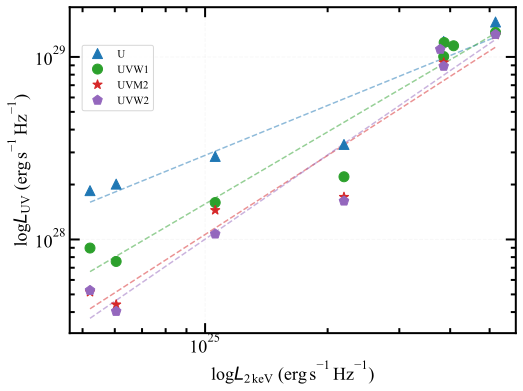

In [22]:
def get_simultaneous_data_F2(uvot,xrt,timebin=1):
    xf=[]
    xferr=[]
    xt=[]
    
    ut=[]
    uf=[]
    uferr=[]
    
    for index,i in enumerate(xrt['mjd']):
        mjd_near_ui=np.argmin(abs(uvot['mjd']-i))  
        mjd_near_u=uvot['mjd'][mjd_near_ui]   
        
        if abs(mjd_near_u-i)<1.0 and i<57429+1:
            
            uf.append(uvot['flux_ext_cor'][mjd_near_ui])
            ut.append(uvot['mjd'][mjd_near_ui])
            uferr.append(uvot['ferr'][mjd_near_ui])
            
            xf.append(xrt['F_2keV'][index])
            xt.append(xrt['mjd'][index])
            xferr.append(xrt['ferr'][index])
            #print(xrt['flux'][index],uvot['nu_f_uv'][mjd_near_ui],i,mjd_near_u,uvot['nu_f_uv_err'][mjd_near_ui],xrt['ferr'][index])                 
    return np.array(xf),np.array(uf),np.array(xt),np.array(ut),np.array(uferr),np.array(xferr) 

xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu =get_simultaneous_data_F2(uvot_uuu,xray_append)
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 =get_simultaneous_data_F2(uvot_uw1,xray_append)
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 =get_simultaneous_data_F2(uvot_um2,xray_append)
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2 =get_simultaneous_data_F2(uvot_uw2,xray_append)


uvot_sim_xf=[xf_uuu,xf_uw1,xf_um2, xf_uw2]
uvot_sim_uf=[uf_uuu,uf_uw1,uf_um2, uf_uw2]

uvot_sim_xf_err=[xferr_uuu,xferr_uw1,xferr_um2, xferr_uw2]
uvot_sim_uf_err=[uferr_uuu,uferr_uw1,uferr_um2, uferr_uw2]


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x_=4*np.pi*D_cm.value**2*x_
    y_=4*np.pi*D_cm.value**2*y_
    
    x1=np.log10(x_)
    y1=np.log10(y_) 
    
    
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]
    
    
    x1_new=np.linspace(min(x1),max(x1),10)
    
    
    k,b=linear_calc(x1,y1)
    print('All',len(x1))
    print(band,spearmanr(x1,y1))
    print(band,k,b)
    y1_new=k*x1_new+b
    #ax.plot(x1_new,y1_new,marker='',color=color,alpha=0.5)    

    
    
    x1_outlier=x1[abs(x1-25.397)>0.01]
    y1_outlier=y1[abs(x1-25.397)>0.01]
    
    k,b=linear_calc(x1_outlier,y1_outlier)
    
    
       
    x2=np.linspace(min(x1_outlier),max(x1_outlier),10)
    print('Without-outlier',len(x1_outlier))
    print(band,spearmanr(x1_outlier,y1_outlier))
    print(band,k,b)
    print()
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(10**x1,10**y1,xerr=xerr,yerr=yerr,marker=marker,markersize=10,fmt='o',color=color,label=label)
    ax.plot(10**x2,10**y2,marker='',color=color,alpha=0.5,ls='--')    

    
set_ax_tick(ax)
#(ax,0.2,0.1,0.2,0.1)    
 


ax.set_xlabel(r'log$ L_\mathregular{2\,keV}$ $\mathregular{(erg\,s^{-1}\,Hz^{-1})}$',fontsize=18)    
ax.set_ylabel(r'log$ L_{\mathregular{UV}}$ $\mathregular{(erg\,s^{-1}\,Hz^{-1})}$',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.2, 0.9),
          ncol=1,loc=0,fontsize=11)

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
ax.tick_params(labelsize=18)
plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)  
#fig.savefig('Mrk1018_uvot_L2_correlation-fig-without-outlier.png',dpi=400)
plt.savefig('Mrk1018_Luvot_L2_correlation-fig-without-outlier.png',
            dpi=400, transparent=False, bbox_inches='tight')


/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.



All 6
uuu SpearmanrResult(correlation=1.0, pvalue=0.0)
uuu 0.9853517338406517 -3.023538607520394
Without-outlier 6
uuu SpearmanrResult(correlation=1.0, pvalue=0.0)
uuu 0.9853517338406517 -3.023538607520394

All 8
uw1 SpearmanrResult(correlation=0.9523809523809524, pvalue=0.00026040002438725105)
uw1 0.715369045157382 4.848719467392963
Without-outlier 8
uw1 SpearmanrResult(correlation=0.9523809523809524, pvalue=0.00026040002438725105)
uw1 0.715369045157382 4.848719467392963

All 6
um2 SpearmanrResult(correlation=0.942857142857143, pvalue=0.004804664723032055)
um2 0.6520998561760347 6.735513796212465
Without-outlier 6
um2 SpearmanrResult(correlation=0.942857142857143, pvalue=0.004804664723032055)
um2 0.6520998561760347 6.735513796212465

All 7
uw2 SpearmanrResult(correlation=0.9285714285714288, pvalue=0.0025194724037946874)
uw2 0.6121024968900171 7.875412407894772
Without-outlier 7
uw2 SpearmanrResult(correlation=0.9285714285714288, pvalue=0.0025194724037946874)
uw2 0.6121024968900171 7.8

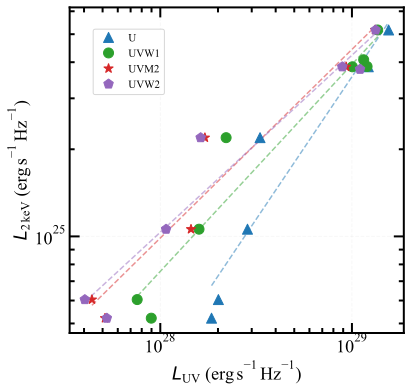

In [23]:
def get_simultaneous_data_F2(uvot,xrt,timebin=1):
    xf=[]
    xferr=[]
    xt=[]
    
    ut=[]
    uf=[]
    uferr=[]
    
    for index,i in enumerate(xrt['mjd']):
        mjd_near_ui=np.argmin(abs(uvot['mjd']-i))  
        mjd_near_u=uvot['mjd'][mjd_near_ui]   
        
        if abs(mjd_near_u-i)<1.0 and i<57429+1:
            
            uf.append(uvot['flux_ext_cor'][mjd_near_ui])
            ut.append(uvot['mjd'][mjd_near_ui])
            uferr.append(uvot['ferr'][mjd_near_ui])
            
            xf.append(xrt['F_2keV'][index])
            xt.append(xrt['mjd'][index])
            xferr.append(xrt['ferr'][index])
            #print(xrt['flux'][index],uvot['nu_f_uv'][mjd_near_ui],i,mjd_near_u,uvot['nu_f_uv_err'][mjd_near_ui],xrt['ferr'][index])                 
    return np.array(xf),np.array(uf),np.array(xt),np.array(ut),np.array(uferr),np.array(xferr) 

xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu =get_simultaneous_data_F2(uvot_uuu,xray_append)
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 =get_simultaneous_data_F2(uvot_uw1,xray_append)
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 =get_simultaneous_data_F2(uvot_um2,xray_append)
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2 =get_simultaneous_data_F2(uvot_uw2,xray_append)


uvot_sim_xf=[xf_uuu,xf_uw1,xf_um2, xf_uw2]
uvot_sim_uf=[uf_uuu,uf_uw1,uf_um2, uf_uw2]

uvot_sim_xf_err=[xferr_uuu,xferr_uw1,xferr_um2, xferr_uw2]
uvot_sim_uf_err=[uferr_uuu,uferr_uw1,uferr_um2, uferr_uw2]


fig = plt.figure(figsize=(6,6),dpi=400)
#fig.subplots_adjust(left=0.1, right=0.95, bottom=0.12, top=0.95)
ax = fig.add_subplot(111)

for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_uf,uvot_sim_xf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x_=4*np.pi*D_cm.value**2*x_
    y_=4*np.pi*D_cm.value**2*y_
    
    x1=np.log10(x_)
    y1=np.log10(y_) 
    
    
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]
    
    
    x1_new=np.linspace(min(x1),max(x1),10)
    
    
    k,b=linear_calc(x1,y1)
    print('All',len(x1))
    print(band,spearmanr(x1,y1))
    print(band,k,b)
    y1_new=k*x1_new+b
    #ax.plot(x1_new,y1_new,marker='',color=color,alpha=0.5)    

    
    
    x1_outlier=x1[abs(y1-25.397)>0.01]
    y1_outlier=y1[abs(y1-25.397)>0.01]
    
    k,b=linear_calc(x1_outlier,y1_outlier)
    
    
       
    x2=np.linspace(min(x1_outlier),max(x1_outlier),10)
    print('Without-outlier',len(x1_outlier))
    print(band,spearmanr(x1_outlier,y1_outlier))
    print(band,k,b)
    print()
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(10**x1,10**y1,xerr=xerr,yerr=yerr,marker=marker,markersize=10,fmt='o',color=color,label=label)
    ax.plot(10**x2,10**y2,marker='',color=color,alpha=0.5,ls='--')    

    
set_ax_tick(ax)
#(ax,0.2,0.1,0.2,0.1)    
ax.set_ylabel(r'$ L_\mathregular{2\,keV}$ $\mathregular{(erg\,s^{-1}\,Hz^{-1})}$',fontsize=18)    
ax.set_xlabel(r'$ L_{\mathregular{UV}}$ $\mathregular{(erg\,s^{-1}\,Hz^{-1})}$',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.3, 0.95),
          ncol=1,fontsize=11)
ax.tick_params(labelsize=18)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)

plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)  
#fig.savefig('Mrk1018_L2_uvot_correlation-fig-without-outlier.png',dpi=400)
plt.savefig('Mrk1018_L2_Luvot_correlation-fig-without-outlier.png', dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
lm = linmix.LinMix(x, y, xsig, ysig, K=2)
lm.run_mcmc(silent=True)

In [ ]:
xray_append.columns

In [ ]:
xray_append[abs(xray_append['mjd']-56450)<1]

### Fuv-F2keV all

In [ ]:
def get_simultaneous_data_nuF2_all(uvot,xrt,timebin=1):
    xf=[]
    xferr=[]
    xt=[]
    
    ut=[]
    uf=[]
    uferr=[]
    
    for index,i in enumerate(xrt['mjd']):
        mjd_near_ui=np.argmin(abs(uvot['mjd']-i))  
        mjd_near_u=uvot['mjd'][mjd_near_ui]   
        
        if abs(mjd_near_u-i)<1.0:
            
            uf.append(uvot['nu_f_uv'][mjd_near_ui])
            ut.append(uvot['mjd'][mjd_near_ui])
            uferr.append(uvot['nu_f_uv_err'][mjd_near_ui])
            
            xf.append(xrt['F_2keV'][index]*v_2keV)
            xt.append(xrt['mjd'][index])
            xferr.append(xrt['ferr'][index])
            #print(xrt['flux'][index],uvot['nu_f_uv'][mjd_near_ui],i,mjd_near_u,uvot['nu_f_uv_err'][mjd_near_ui],xrt['ferr'][index])                 
    return np.array(xf),np.array(uf),np.array(xt),np.array(ut),np.array(uferr),np.array(xferr) 

xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu =get_simultaneous_data_nuF2_all(uvot_uuu,xray_append)
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 =get_simultaneous_data_nuF2_all(uvot_uw1,xray_append)
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 =get_simultaneous_data_nuF2_all(uvot_um2,xray_append)
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2 =get_simultaneous_data_nuF2_all(uvot_uw2,xray_append)

uvot_sim_xf=[xf_uuu,xf_uw1,xf_um2, xf_uw2]
uvot_sim_uf=[uf_uuu,uf_uw1,uf_um2, uf_uw2]

uvot_sim_xf_err=[xferr_uuu,xferr_uw1,xferr_um2, xferr_uw2]
uvot_sim_uf_err=[uferr_uuu,uferr_uw1,uferr_um2, uferr_uw2]

In [ ]:

fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)


for i,(band,x_,y_,xerr,yerr) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)
    y1=np.log10(y_)  
    marker =marker_dict_uv[band]
    color= color_dict_uv[band]
    label=label_dict_uv[band]    
    ax.errorbar(10**x1,10**y1,xerr=xerr,yerr=yerr,marker=marker,markersize=10,fmt='o',color=color,label=label)
    
    
set_ax_tick(ax)
#(ax,0.2,0.1,0.2,0.1)    
 


ax.set_xlabel(r'log$\nu F_\mathregular{2\,keV}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18)    
ax.set_ylabel(r'log${\nu} F_{\mathregular{UV}}$ $\mathregular{(erg\,s^{-1}\,cm^{-2})}$',fontsize=18) 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.2, 0.8),ncol=1,loc='right',fontsize=10)

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)

plt.semilogx()
plt.semilogy()

plt.subplots_adjust(hspace = 0.0)
plt.legend()    
fig.savefig('Mrk1018_uvot_nuF2_all_correlation-fig.png',dpi=400)


## mjd_select

## defsimultaneous

In [ ]:
def get_simultaneous_mjd(uvot,xray_append,timebin=1.0):
    t_xray=[]
    t_uv=[]
    for j in xray_append['mjd']:
        mjd_near_i=np.argmin(abs(uvot['mjd']-j))  
        mjd_near=uvot['mjd'][mjd_near_i] 
        if abs(mjd_near-j)<timebin:
            t_uv.append(mjd_near)
            t_xray.append(j)                
    return np.array(t_uv),np.array(t_xray)

In [ ]:
t_uw1,t_xray=get_simultaneous_mjd(uvot_uw1,xray_append,timebin=1)
mjd_select=t_xray[t_xray<57429+1]
mjd_select_1=t_xray[t_xray<57033]
mjd_select_r=t_xray[t_xray>58350]
mjd_select_all=t_xray

## SED

In [ ]:
xray_append.columns

In [ ]:
uvot_uw1.columns

In [ ]:
mjd_select

In [ ]:
def plot_uv_sed_mjd(uvotalldata,mjd,marker,color):
    mjd_near_i=np.argmin(abs(uvotalldata['mjd']-mjd))
    mjd_near=uvotalldata['mjd'][mjd_near_i]
    if abs(mjd_near-mjd)<1.0:
        #print(mjd,mjd_near,uvotalldata['band'][mjd_near_i])
        v_i=uvotalldata['frequency'][mjd_near_i]
        v_f_v_i=uvotalldata['nu_f_uv'][mjd_near_i]
        v_f_v_i_err=uvotalldata['nu_f_uv_err'][mjd_near_i]
        ax.scatter(v_i,v_f_v_i,marker=marker,label=int(mjd),color=color)
            
def plot_xrt_sed_mjd(xray_append,mjd,marker,color):
    mjd_near_i=np.argmin(abs(xray_append['mjd']-mjd))
    mjd_near=xray_append['mjd'][mjd_near_i]
    if abs(mjd_near-mjd)<1.0:
        for i in range(5):
            print(i+1,xray_append.columns[i+16])
            v_i=(i+1)*2*v_1keV
            f_v_i=xray_append[xray_append.columns[i+16]][mjd_near_i]
            ax.scatter(v_i,v_i*f_v_i,marker=marker,label=int(mjd),color=color)


In [ ]:
mjd_select

In [ ]:
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

#markers_pd=['+','x','3','4',4,5,6,7,]
markers_pd=['.','*','p','X','s','^','v','D']
marker_dict_mjd = dict(zip(mjd_select, markers_pd[:len(mjd_select)]))


for mjd in mjd_select:
    marker=marker_dict_mjd[mjd]
    #marker='.'
    if mjd<=54853:
        color='r'
    elif mjd<=57033:
        color='g'
    else:
        color='b'
    plot_xrt_sed_mjd(xray_append,mjd,marker,color)
    plot_uv_sed_mjd(uvot_uuu,mjd,marker,color)
    plot_uv_sed_mjd(uvot_uw1,mjd,marker,color)
    plot_uv_sed_mjd(uvot_um2,mjd,marker,color)
    plot_uv_sed_mjd(uvot_uw2,mjd,marker,color)
    
       

#ax.set_title('SED of Mrk1018')
ax.semilogy()
ax.semilogx()
ax.set_ylabel(r'$\nu F_{{\nu}}$ $\mathregular{(erg\, s^{-1}\, cm^{-2} )}$')
ax.set_xlabel(r'${\nu} \mathregular{(Hz)}$')

#ax.set_xlim(10**14,10**19)
set_ax_tick(ax)
ax.xaxis.set_major_locator(ticker.LogLocator(base=10,numticks=4))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10,numticks=4))


handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h for h in handles]
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels,hdl)) 
by_label = OrderedDict(zip(labels,handles)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.9),
          loc=2, numpoints=1,fontsize=11.,title='MJD' )

#ax.legend(bbox_to_anchor=(1.0, 0.9),loc=2, numpoints=1,fontsize=11. )
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
plt.savefig('/Users/brettlv/Downloads/Mrk1018/Mrk1018_sed.png', dpi=400, transparent=False, bbox_inches='tight')

# Show figure
#plt.show()


In [ ]:
mjd_select

## plot_alpha_ox

In [ ]:
data_alpha_ox

In [ ]:
nu_uw1,v_2keV

## alpha_ox Luv

### markers colors

In [ ]:
markers_alpha_ox_pd=['*','.','+','d','h','v','^','x','>','1','2','3','4','8','p','P','<','H','X','D','|','_']
colors_alpha_ox = cm.get_cmap('tab10', 10)
colors_alpha_ox_pd=[colors_alpha_ox(0),colors_alpha_ox(1),colors_alpha_ox(2),colors_alpha_ox(3),colors_alpha_ox(4),colors_alpha_ox(5),colors_alpha_ox(6),colors_alpha_ox(7),colors_alpha_ox(8),colors_alpha_ox(9),colors_alpha_ox(10),]
markers_alpha_ox_dict=dict(zip(mjd_select, markers_alpha_ox_pd[:len(mjd_select)]))
colors_alpha_ox_dict=dict(zip(mjd_select, colors_alpha_ox_pd[:len(mjd_select)]))

In [ ]:
data_alpha_ox.columns

### alpha_ox_L_uw1

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)

ax.scatter(data_alpha_ox['L_uw1'], data_alpha_ox['alpha_ox'])

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.18, 0.8),ncol=1,loc='right',fontsize=10)

ax.semilogx()
#ax.set_xlabel(r'$F_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,cm^{-2}$)')
ax.set_xlabel(r'$L_{\mathregular{2600 \AA}}$ $\mathregular{(erg\,s^{-1}\,Hz^{-1})}$')
ax.set_ylabel(r'${\alpha_\mathregular{OX}}$')

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
plt.savefig('/Users/brettlv/Downloads/Mrk1018/Mrk1018_alpha_ox_L_uw1.png', dpi=400, transparent=False, bbox_inches='tight')

# Show figure
plt.show()
    
    

## alpha_ox L2keV

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)



ax.scatter(data_alpha_ox['L_2keV'], data_alpha_ox['alpha_ox'])

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.18, 0.8),ncol=1,loc='right',fontsize=10)

ax.semilogx()
#ax.set_xlabel(r'$F_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,cm^{-2}$)')
#ax.set_xlabel(r'$L_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,Hz^{-1}$)')
ax.set_xlabel(r'$L_{\mathregular{2\,keV}}$ $\mathregular{(erg\,s^{-1}\,Hz^{-1})}$')
ax.set_ylabel(r'${\alpha_\mathregular{OX}}$')

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
plt.savefig('/Users/brettlv/Downloads/Mrk1018/Mrk1018_alpha_ox_L_2keV.png', dpi=400, transparent=False, bbox_inches='tight')

# Show figure
plt.show()

## alpha_ox Lbol
30*L_{2-10keV}

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)

ax.scatter(15*data_alpha_ox['Lx'], data_alpha_ox['alpha_ox'])


ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.18, 0.8),ncol=1,loc='right',fontsize=10)

ax.semilogx()
#ax.set_xlabel(r'$F_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,cm^{-2}$)')
#ax.set_xlabel(r'$L_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,Hz^{-1}$)')
#ax.set_xlabel(r'$L_{\mathregular{2\,keV}}$ ($erg\,s^{-1}\,Hz^{-1}$)')
ax.set_ylabel(r'${\alpha_\mathregular{OX}}$')
ax.set_xlabel(r'15$ \cdot L_{\mathregular{2-10\,keV}}$ $\mathregular{(erg\,s^{-1})}$')

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
plt.savefig('/Users/brettlv/Downloads/Mrk1018/Mrk1018_alpha_ox_L_bol.png', dpi=400, transparent=False, bbox_inches='tight')

# Show figure
plt.show()

## alpha_ox Lbol_rate

In [ ]:
Xu
αox = (−0.163 ± 0.070) log Lbol/LEdd + (0.185 ± 0.321).

Lusso
αox(λEdd) = (0.397 ± 0.043)Log λEdd + (1.797 ± 0.047).

In [ ]:
data_alpha_ox

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)

ax.scatter(np.log10(15*data_alpha_ox['L_rate']), data_alpha_ox['alpha_ox'])

bolrx=np.linspace(-6,-3,10)
bolrx1=np.linspace(-3,-1,10)

bolry=-0.163*bolrx+0.185
bolry1=0.397*bolrx1+1.796

ax.plot(bolrx,bolry,label='Xu')
ax.plot(bolrx1,bolry1,label='Lusso')
    
    
set_ax_tick(ax)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.18, 0.8),ncol=1,loc='right',fontsize=10)

#ax.semilogx()
#ax.set_xlabel(r'$F_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,cm^{-2}$)')
#ax.set_xlabel(r'$L_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,Hz^{-1}$)')
#ax.set_xlabel(r'$L_{\mathregular{2\,keV}}$ ($erg\,s^{-1}\,Hz^{-1}$)')
set_ax_locator(ax,1,0.5,0.5,0.1)
ax.set_ylabel(r'$\mathregular{\alpha_{OX}}$')
ax.set_xlabel(r'$ L_{\mathregular{bol}}/L_{Edd}$')
ax.set_ylim(0,2.0)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
plt.savefig('/Users/brettlv/Downloads/Mrk1018/Mrk1018_alpha_ox_L_bol_rate.png', dpi=400, transparent=False, bbox_inches='tight')

# Show figure
plt.show()

## alpha_ox nu_L_nu

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)
for mjd in mjd_select:
    marker=markers_alpha_ox_dict[mjd]
    color=colors_alpha_ox_dict[mjd]
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    ax.scatter(4*np.pi*D_cm.value**2*nu_uw1*f_uw1, alpha_ox,marker=marker,label=int(mjd),color=color)

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.18, 0.8),ncol=1,loc='right',fontsize=10)

ax.semilogx()
#ax.set_xlabel(r'$F_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,cm^{-2}$)')
ax.set_xlabel(r'$\nu L_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}$)')
#ax.set_xlabel(r'$L_{\mathregular{2\,keV}}$ ($erg\,s^{-1}\,Hz^{-1}$)')
ax.set_ylabel(r'$\mathregular{\alpha_{OX}}$')

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
plt.savefig('/Users/brettlv/Downloads/Mrk1018/Mrk1018_alpha_ox_nu_L_uvw1.png', dpi=400, transparent=False, bbox_inches='tight')

# Show figure
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)
for mjd in mjd_select:
    marker=markers_alpha_ox_dict[mjd]
    color=colors_alpha_ox_dict[mjd]
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    ax.scatter(4*np.pi*D_cm.value**2*v_2keV*f_2keV, alpha_ox,marker=marker,label=int(mjd),color=color)

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.18, 0.8),ncol=1,loc='right',fontsize=10)

ax.semilogx()
#ax.set_xlabel(r'$F_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}\,cm^{-2}$)')
#ax.set_xlabel(r'$\nu L_{\mathregular{2600 \AA}}$ ($erg\,s^{-1}$)')
ax.set_xlabel(r'$\nu L_{\mathregular{2\,keV}}$ ($erg\,s^{-1}$)')
ax.set_ylabel(r'$\mathregular{\alpha_{OX}}$')

ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.subplots_adjust(hspace = 0.0)
plt.savefig('/Users/brettlv/Downloads/Mrk1018/Mrk1018_alpha_ox_nu_L_2keV.png', dpi=400, transparent=False, bbox_inches='tight')

# Show figure
plt.show()

# two clagn

In [ ]:
NGC2617=pd.read_excel('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/data_ihep/two_cl_AGN.xlsx',sheet_name='Sheet1',index=None)
#data.columns
ZTF18aajupnt=pd.read_excel('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/data_ihep/two_cl_AGN.xlsx',sheet_name='Sheet2',index=None)
#data.columns

NGC2617['NAME']

In [ ]:
NGC2617.columns

In [ ]:
ZTF18aajupnt.columns

# clquasars

In [ ]:
changing_look_quasars=pd.read_excel('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/data_ihep/changing-look-quasars.xlsx',sheet_name='工作表1',index=None)
changing_look_quasars.columns

# lishuangliang xuyadi

In [ ]:
xu_li_path='/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/data_ihep/xu_lisl.xlsx'
paper_lisl=pd.read_excel(xu_li_path,sheet_name='Sheet1',index=None)
paper_lisl.columns

paper_xuyd=pd.read_excel(xu_li_path,sheet_name='Sheet2',index=None)
paper_xuyd.columns

# Mrk1018_subplots_plus_2individuals_alpha_ox_L_x_Luv_rate

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2



def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(9,4))
ax1 = fig.add_subplot(121)


x1='log_lambda'
x2='log(Lbol/Ledd)'
x3='logLx'
x4='bhmasslog'
x5='logLUV'
x6='logLv2keV'
x7='LogLv2500'
x4_logm='bhmasslog'
x4_m='bhmass'
x_state='state'
x8='log(Luv/Ledd)'
y='alpha_ox'



for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x3]#logLx
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='*',color='grey',label='Type2(NGC2617)')

for row in range(len(ZTF18aajupnt)):        
    px=ZTF18aajupnt.loc[row][x3]#logLx
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        

#F_2_10s=[1.14e-11,9.32e-12,7.88e-12,8.78e-12,9.83e-12,2.58e-12,8.26e-12,1.97e-12,1.5e-12,2.54e-12,1.89e-12,3.03e-12]
#for mjd,F_ in zip(mjds,F_2_10s):
#data_alpha_ox

for i in range(len(data_alpha_ox)):
    marker='o'
    if data_alpha_ox.iloc[i]['mjd']<=54853:
        color='r'
    elif data_alpha_ox.iloc[i]['mjd']<=57033:
        color='g'
    else:
        color='b'

    ax1.scatter(4*np.pi*D_cm.value**2*v_2keV*data_alpha_ox.iloc[i]['F_2keV']/Ledd, data_alpha_ox.iloc[i]['alpha_ox'],marker=marker,label='Mrk 1018',color=color,s=18)







        

ax2 = fig.add_subplot(122,sharey=ax1)


for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x8]#luv/ledd
    px_=10**NGC2617.loc[row][x5]    
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='*',color='grey',label='Type2(NGC2617)')
        

for row in range(len(ZTF18aajupnt)):  
    px=ZTF18aajupnt.loc[row][x8]#luv/ledd
    px_=10**ZTF18aajupnt.loc[row][x5]
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        

for i in range(len(data_alpha_ox)):
    marker='o'
    if data_alpha_ox.iloc[i]['mjd']<=54853:
        color='r'
    elif data_alpha_ox.iloc[i]['mjd']<=57033:
        color='g'
    else:
        color='b'

    ax2.scatter(4*np.pi*D_cm.value**2*v_2keV*data_alpha_ox.iloc[i]['f_uw1']/Ledd, data_alpha_ox.iloc[i]['alpha_ox'],marker=marker,label='Mrk 1018',color=color,s=18)



    
'''handles, labels = ax1.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax1.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.95),
           ncol=1,fontsize=11,)'''

handles, labels =ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax2.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.7, 0.95),ncol=1,
           fontsize=11)


set_ax_tick(ax1)
set_ax_tick(ax2)
set_ax_locator(ax1,0.01,0.001,0.2,0.05)
set_ax_locator(ax2,0.1,0.01,0.2,0.05)


ax1.set_xlim(1e-4,1e-2)
ax1.set_ylim(1,2)
ax1.set_xlabel(r'$\nu L_{2keV}/L_{Edd}$')
ax1.set_ylabel(r'$ \alpha_{OX} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)


ax1.semilogx()
ax2.semilogx()
ax2.set_xlim(0.8e-3,3e-2)
ax2.set_ylim(1,2)

#plt.xlabel(r'UV Eddington rate $\lambda L_{2600\AA}/L_{Edd}$')
ax2.set_xlabel(r'$\nu L_{UV}/L_{Edd}$')
#ax2.set_ylabel(r'UV-xray spectrum index $ \alpha_{OX} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)

plt.subplots_adjust(hspace = 0.0,wspace = 0.25)

plt.savefig('Mrk1018_subplots_plus_2individuals_alpha_ox_L_x_Luv_rate.png',
            dpi=400,transparent=False, bbox_inches='tight')


## all_alpha_ox

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2



def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(8,4),dpi=400)
ax1 = fig.add_subplot(121)


x1='log_lambda'
x2='log(Lbol/Ledd)'
x3='logLx'
x4='bhmasslog'
x5='logLUV'
x6='logLv2keV'
x7='LogLv2500'
x4_logm='bhmasslog'
x4_m='bhmass'
x_state='state'
x8='log(Luv/Ledd)'
y='alpha_ox'



for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x3]#logLx
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='*',color='grey',label='Type2(NGC2617)')

for row in range(len(ZTF18aajupnt)):        
    px=ZTF18aajupnt.loc[row][x3]#logLx
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        

#F_2_10s=[1.14e-11,9.32e-12,7.88e-12,8.78e-12,9.83e-12,2.58e-12,8.26e-12,1.97e-12,1.5e-12,2.54e-12,1.89e-12,3.03e-12]
#for mjd,F_ in zip(mjds,F_2_10s):

for mjd in mjd_select_all:
    #marker=markers_alpha_ox_dict[mjd]
    #color=colors_alpha_ox_dict[mjd]

        
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    if mjd<57429:
        marker='.'
        color=colors_cm_10(0)
        ax1.scatter(4*np.pi*D_cm.value**2*v_2keV*f_2keV/Ledd, alpha_ox,label='Mrk1018',marker=marker,color=color)

    else:
        marker='.'
        color=colors_cm_10(1)
        ax1.scatter(4*np.pi*D_cm.value**2*v_2keV*f_2keV/Ledd, alpha_ox,label='Mrk1018',marker=marker,color=color)

    



handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax1.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)


        

ax2 = fig.add_subplot(122,sharey=ax1)



for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x8]#luv/ledd
    px_=10**NGC2617.loc[row][x5]    
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='*',color='grey',label='Type2(NGC2617)')
        

for row in range(len(ZTF18aajupnt)):  
    px=ZTF18aajupnt.loc[row][x8]#luv/ledd
    px_=10**ZTF18aajupnt.loc[row][x5]
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        

for mjd in mjd_select_all:
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    if mjd<57429:
        marker='.'
        color=colors_cm_10(0)
        ax2.scatter(4*np.pi*D_cm.value**2*nu_uw1*f_uw1/Ledd, alpha_ox,marker=marker,label='Mrk1018',color=color)

    else:
        marker='.'
        color=colors_cm_10(1)
        ax2.scatter(4*np.pi*D_cm.value**2*nu_uw1*f_uw1/Ledd, alpha_ox-0.3,marker=marker,label='Mrk1018',color=color)

    #marker=markers_alpha_ox_dict[mjd]
    #color=colors_alpha_ox_dict[mjd]

    
    

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax2.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)


#ax1.legend()
#ax2.legend()


set_ax_tick(ax1)
set_ax_tick(ax2)
set_ax_locator(ax1,0.01,0.001,0.2,0.05)
set_ax_locator(ax2,0.1,0.01,0.2,0.05)


ax1.set_xlim(1e-4,1e-2)
ax1.set_ylim(0.5,2)
ax1.set_xlabel(r'$\nu L_{2keV}/L_{Edd}$')
ax1.set_ylabel(r'$ \alpha_{OX} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)


ax1.semilogx()
ax2.semilogx()
ax2.set_xlim(0.8e-3,3e-2)
ax2.set_ylim(0.5,2)

#plt.xlabel(r'UV Eddington rate $\lambda L_{2600\AA}/L_{Edd}$')
ax2.set_xlabel(r'$\nu L_{UV}/L_{Edd}$')
#ax2.set_ylabel(r'UV-xray spectrum index $ \alpha_{OX} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)

plt.subplots_adjust(hspace = 0.0,wspace = 0.0)
plt.tight_layout()
plt.style.use('default')
fig.savefig('Mrk1018_subplots_plus_2individuals_alpha_ox_L_x_Luv_rate_ALL.png',dpi=400)



## lxluv

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2



def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(8,6),dpi=400)
ax1 = fig.add_subplot(111)


x1='log_lambda' #log(Lbol/Ledd) Li
x2='log(Lbol/Ledd)'#Xu & Clquasars

x6='logLv2keV'#Xu
x3='logLx'# logL2keV Li & Clquasars

x4='bhmasslog' # Li Xu
x4_m='bhmass'  # Clquasars
x_state='state' # Clquasars

x5='logLUV' #Li & Clquasars 
x7='LogLv2500'#Xu


y='alpha_ox'



for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x3]#logLx
    py=NGC2617.loc[row][x5]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/v_2keV,10**py/nu_uw1,marker='*',color='grey',label='Type2(NGC2617)')

for row in range(len(ZTF18aajupnt)):        
    px=ZTF18aajupnt.loc[row][x3]#logLx
    py=ZTF18aajupnt.loc[row][x5]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/v_2keV,10**py/nu_uw1,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        
for row in range(len(paper_xuyd)):        
    px=paper_xuyd.loc[row][x6]
    py=paper_xuyd.loc[row][x7]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) and py.find('$<$'):
        continue
        #py=float(py.split('$<$')[1])   
        #plt.errorbar(px,py,yerr=0.1,uplims=True,color='black',label='xuyd') 
    else:        
        plt.scatter(10**px,10**py,color='black',label='xuyd')
        #print()

for row in range(len(paper_lisl)):        
    px=paper_lisl.loc[row][x3]
    py=paper_lisl.loc[row][x5]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        plt.scatter(10**px,10**py,marker='*',color='grey',label='lisl')         
        
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax1.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)



set_ax_tick(ax1)


#ax1.set_xlim(1e-4,1e-2)
#ax1.set_ylim(1,2)

ax1.set_xlabel(r'$ L_{2keV}$')
ax1.set_ylabel(r'$ L_{UV} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
ax1.semilogx()
ax1.semilogy()

plt.subplots_adjust(hspace = 0.0,wspace = 0.0)
plt.tight_layout()
plt.style.use('default')
fig.savefig('alls_L_x_Luv_rate.png',dpi=400)



## all_Fuvw1_F2-10

## plus_CLquasars

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2



def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(8,4),dpi=400)
ax1 = fig.add_subplot(121)


x1='log_lambda'
x2='log(Lbol/Ledd)'
x3='logLx'
x4='bhmasslog'
x5='logLUV'
x6='logLv2keV'
x7='LogLv2500'
x4_logm='bhmasslog'
x4_m='bhmass'
x_state='state'
x8='log(Luv/Ledd)'
y='alpha_ox'



for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x3]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass 
    pstate=changing_look_quasars.loc[row][x_state]
    
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(px) or isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            ax1.scatter(10**px/pledd,py,marker='^',color='black',label=pstate)
        else:
            ax1.scatter(10**px/pledd,py,marker='v',color='grey',label=pstate)
        

for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x3]#logLx
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='*',color='grey',label='Type2(NGC2617)')

for row in range(len(ZTF18aajupnt)):        
    px=ZTF18aajupnt.loc[row][x3]#logLx
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        

#F_2_10s=[1.14e-11,9.32e-12,7.88e-12,8.78e-12,9.83e-12,2.58e-12,8.26e-12,1.97e-12,1.5e-12,2.54e-12,1.89e-12,3.03e-12]
#for mjd,F_ in zip(mjds,F_2_10s):

for mjd in mjd_select:
    marker=markers_alpha_ox_dict[mjd]
    color=colors_alpha_ox_dict[mjd]
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    ax1.scatter(4*np.pi*D_cm.value**2*v_2keV*f_2keV/Ledd, alpha_ox,marker=marker,label=int(mjd),color=color)


'''handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)
'''



        

ax2 = fig.add_subplot(122,sharey=ax1)


for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x5]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass      
    pstate=changing_look_quasars.loc[row][x_state]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(px) or isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            ax2.scatter(10**px/pledd,py,marker='^',color='black',label=pstate)
        else:
            ax2.scatter(10**px/pledd,py,marker='v',color='grey',label=pstate)

for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x8]#luv/ledd
    px_=10**NGC2617.loc[row][x5]    
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='*',color='grey',label='Type2(NGC2617)')
        

for row in range(len(ZTF18aajupnt)):  
    px=ZTF18aajupnt.loc[row][x8]#luv/ledd
    px_=10**ZTF18aajupnt.loc[row][x5]
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        

for mjd in mjd_select:
    marker=markers_alpha_ox_dict[mjd]
    color=colors_alpha_ox_dict[mjd]
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    ax2.scatter(4*np.pi*D_cm.value**2*nu_uw1*f_uw1/Ledd, alpha_ox,marker=marker,label=int(mjd),color=color)

    

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)


set_ax_tick(ax1)
set_ax_tick(ax2)
set_ax_locator(ax1,0.01,0.001,0.2,0.05)
set_ax_locator(ax2,0.1,0.01,0.2,0.05)



ax1.set_xlabel(r'$\nu L_{2keV}/L_{Edd}$')
ax1.set_ylabel(r'$ \alpha_{OX} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)


ax1.semilogx()
ax2.semilogx()

#ax1.set_xlim(1e-4,1e-2)
#ax1.set_ylim(1,2)
#ax2.set_xlim(0.8e-3,3e-2)
#ax2.set_ylim(1,2)

#plt.xlabel(r'UV Eddington rate $\lambda L_{2600\AA}/L_{Edd}$')
ax2.set_xlabel(r'$\nu L_{UV}/L_{Edd}$')
#ax2.set_ylabel(r'UV-xray spectrum index $ \alpha_{OX} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)

plt.subplots_adjust(hspace = 0.0,wspace = 0.0)
plt.tight_layout()
plt.style.use('default')
fig.savefig('Mrk1018_subplots_plus_2individuals_clquasars_alpha_ox_L_x_Luv_rate.png',dpi=400)



### parameter list

## 2paper_plus_quasars_alpha_ox_Lbol_rate

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)

def isString(obj):
    return type(obj) is type('')

x1='log_lambda' #log(Lbol/Ledd) Li
x2='log(Lbol/Ledd)'#Xu & Clquasars

x6='logLv2keV'#Xu
x3='logLx'# logL2keV Li & Clquasars

x4='bhmasslog' # Li Xu
x4_m='bhmass'  # Clquasars
x_state='state' # Clquasars

x5='logLUV' #Li & Clquasars
x7='LogLv2500'#Xu

y='alpha_ox'

for row in range(len(paper_xuyd)):        
    px=paper_xuyd.loc[row][x2]
    py=paper_xuyd.loc[row][y]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) and py.find('$<$'):
        continue
        #py=float(py.split('$<$')[1])   
        #plt.errorbar(px,py,yerr=0.1,uplims=True,color='black',label='xuyd') 
    else:        
        plt.scatter(px,py,color='black',label='xuyd')
        #print()
        
for row in range(len(paper_lisl)):        
    px=paper_lisl.loc[row][x1]
    py=paper_lisl.loc[row][y]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        plt.scatter(px,py,marker='*',color='grey',label='lisl') 
        
for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x2]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass 
    pstate=changing_look_quasars.loc[row][x_state]   
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            plt.scatter(px,py,marker='^',color='red',label=pstate)
        else:
            plt.scatter(px,py,marker='v',color='blue',label=pstate)

            
for mjd in mjd_select:
    marker='.'
    color='r'
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    ax.scatter(30*Lx/Ledd, alpha_ox,marker=marker,label='Mrk1018',color=color)            
            
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.80),ncol=1,fontsize=6,loc='right')

#plt.semilogx()
#plt.xlim(5e-4,1e-2)
plt.ylim(0.,2.5)
plt.xlabel(r'log($L_{bol}/L_{Edd}$)')
plt.ylabel(r'$ \alpha_{OX} $')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('2paper_plus_quasars_alpha_ox_Lbol_rate.png',dpi=400)   



## 2paper_plus_quasars_alpha_ox_L2keV

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)

def isString(obj):
    return type(obj) is type('')

x1='log_lambda' #log(Lbol/Ledd) Li
x2='log(Lbol/Ledd)'#Xu & Clquasars

x6='logLv2keV'#Xu
x3='logLx'# logL2keV Li & Clquasars

x4='bhmasslog' # Li Xu
x4_m='bhmass'  # Clquasars
x_state='state' # Clquasars

x5='logLUV' #Li & Clquasars
x7='LogLv2500'#Xu

y='alpha_ox'

for row in range(len(paper_xuyd)):        
    px=paper_xuyd.loc[row][x6]
    py=paper_xuyd.loc[row][y]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) and py.find('$<$'):
        continue
        #py=float(py.split('$<$')[1])   
        #plt.errorbar(px,py,yerr=0.1,uplims=True,color='black',label='xuyd') 
    else:        
        plt.scatter(px,py,color='black',label='xuyd')
        #print()
        
for row in range(len(paper_lisl)):        
    px=paper_lisl.loc[row][x3]
    py=paper_lisl.loc[row][y]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        plt.scatter(px,py,marker='*',color='grey',label='lisl') 
        
for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x3]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass 
    pstate=changing_look_quasars.loc[row][x_state]   
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            plt.scatter(px,py,marker='^',color='red',label=pstate)
        else:
            plt.scatter(px,py,marker='v',color='blue',label=pstate)

            
for mjd in mjd_select:
    marker='.'
    color='r'
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    ax.scatter(np.log10(4*np.pi*D_cm.value**2*f_2keV), alpha_ox,marker=marker,label='Mrk1018',color=color)            
            
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.80),ncol=1,fontsize=6,loc='right')

#plt.semilogx()
#plt.xlim(5e-4,1e-2)
plt.ylim(0.,2.5)
plt.xlabel(r'log($L_{2keV}$)')
plt.ylabel(r'$ \alpha_{OX} $')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('2paper_plus_quasars_alpha_ox_L2keV.png',dpi=400)   



## 2paper_plus_quasars_alpha_ox_Luv

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)

def isString(obj):
    return type(obj) is type('')

x1='log_lambda' #log(Lbol/Ledd) Li
x2='log(Lbol/Ledd)'#Xu & Clquasars

x6='logLv2keV'#Xu
x3='logLx'# logL2keV Li & Clquasars

x4='bhmasslog' # Li Xu
x4_m='bhmass'  # Clquasars
x_state='state' # Clquasars

x5='logLUV' #Li & Clquasars
x7='LogLv2500'#Xu

y='alpha_ox'

for row in range(len(paper_xuyd)):        
    px=paper_xuyd.loc[row][x7]
    py=paper_xuyd.loc[row][y]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) and py.find('$<$'):
        continue
        #py=float(py.split('$<$')[1])   
        #plt.errorbar(px,py,yerr=0.1,uplims=True,color='black',label='xuyd') 
    else:        
        plt.scatter(px,py,color='black',label='xuyd')
        #print()
        
for row in range(len(paper_lisl)):        
    px=paper_lisl.loc[row][x5]
    py=paper_lisl.loc[row][y]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        plt.scatter(px,py,marker='*',color='grey',label='lisl') 
        
for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x5]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass 
    pstate=changing_look_quasars.loc[row][x_state]   
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            plt.scatter(px,py,marker='^',color='red',label=pstate)
        else:
            plt.scatter(px,py,marker='v',color='blue',label=pstate)

            
for mjd in mjd_select:
    marker='.'
    color='r'
    alpha_ox, alpha_ox_1,f_uw1,f_2keV,Lx =get_alpha_ox_mjd(uvot_uw1,xray_append,mjd,marker,color)
    print(alpha_ox, alpha_ox_1)
    ax.scatter(np.log10(4*np.pi*D_cm.value**2*f_uw1), alpha_ox,marker=marker,label='Mrk1018',color=color)            
            
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.80),ncol=1,fontsize=6,loc='right')

#plt.semilogx()
#plt.xlim(5e-4,1e-2)
plt.ylim(0.,2.5)
plt.xlabel(r'log($L_{UV}$)')
plt.ylabel(r'$ \alpha_{OX} $')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('2paper_plus_quasars_alpha_ox_Luv.png',dpi=400)   



# bokeh

In [ ]:
uvot_uw1.columns

In [ ]:
radio_bokeh.columns

In [ ]:
radio_rescale_bokeh.columns

In [ ]:
data_alpha_ox.columns

In [ ]:
data_alpha_ox

## tooltips

In [ ]:
tooltips_xray = [
            ('time','@mjd{0.0f}'),('g', '@gamma'),('Edd_r', '@edd_rate'), 
            ('f', '@flux'),  ('ins','@ins'),('id','@obsid'),('chi','@chi')    
           ]

tooltips_radio = [
            ('time','@meanmjd{0.0f}'),('freq', '@frequency'), 
            ('f', '@{Fint(mJy)}{0.1f}'),('band','@band'),   
           ]

tooltips_radio_rescale = [
            ('time','@meanmjd{0.0f}'),('Flux', 'rescaled_to_5GHz'), 
            ('f', '@scaled_flux{0.1f}'),('band','@band'),   
           ]

tooltips_uvot = [('freq', '@frequency'), 
            ('time','@mjd{0.0f}'),('f', '@flux_ext_cor'),('band','@band')  
           ]




In [ ]:
toolList = ['lasso_select','poly_select','pan','box_zoom','crosshair', 'tap', 'reset', 'save']

## X-ray

In [ ]:
# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.io import output_file

from bokeh.layouts import gridplot
from bokeh.layouts import column
# Bokeh Library




from bokeh.models import ColumnDataSource, CategoricalColorMapper, NumeralTickFormatter,BasicTickFormatter
from bokeh.models import Axis,Range1d
# Bokeh Libraries
from bokeh.models import ColumnDataSource, CategoricalColorMapper, NumeralTickFormatter,BasicTickFormatter
from bokeh.models import Axis,Span,Range1d
from bokeh.models.widgets import Tabs, Panel
from bokeh.models import HoverTool


# Output inline in the notebook
#output_file('Mrk1018-tabbed-bokeh.html',title='Mrk1018-tabbed')
output_file('Mrk1018-X-ray-bokeh.html',title='Mrk1018-X-ray')

# Store the data in a ColumnDataSource

uvot_stats_cds = ColumnDataSource(uvot_bokeh)
radio_stats_cds = ColumnDataSource(radio_bokeh)
radio_rescale_stats_cds = ColumnDataSource(radio_rescale_bokeh)

#zyan_stats_cds = ColumnDataSource(datazy1)
#paper_stats_cds=ColumnDataSource(xray_paper_bokeh)
xray_stats_cds=ColumnDataSource(xray_append)



# Create a CategoricalColorMapper that assigns specific colors to wins and losses
#win_loss_mapper = CategoricalColorMapper(factors = ['W', 'L'], palette=['Green', 'Red'])
color_mapper = CategoricalColorMapper(factors = ['S','C','X','N','Su'], palette=['Green', 'Red','Blue','Lime','Black'])
# Specify the tools


############################################################################################
####tab1


# Create a figure relating the percentages
fluxFig = figure(title='flux',
                plot_height=300, plot_width=600, tools=toolList,
                x_axis_label='mjd', y_axis_label='flux',y_axis_type='log')
# Draw with circle markers
fluxFig.circle(x='mjd', y='flux', source=xray_stats_cds, size=5,legend='X',color=dict(field='ins', transform=color_mapper))
# Format the y-axis tick labels as percenages

fluxFig.legend.label_text_font_size = "10pt"
fluxFig.legend.border_line_width = 2
fluxFig.legend.border_line_color = "navy"
fluxFig.legend.border_line_alpha = 0.01
fluxFig.legend.label_standoff = 5
fluxFig.legend.glyph_width = 5
fluxFig.legend.spacing = 5
fluxFig.legend.padding = 5
fluxFig.legend.margin = 5  
fluxFig.legend.location = "bottom_left"
fluxFig.legend.click_policy="hide"           
              

hover_glyph_xray_flux = fluxFig.circle(x='mjd', y='flux', source=xray_stats_cds,
                         size=20, alpha=0,
                         hover_fill_color='red', hover_alpha=0.8)
fluxFig.add_tools(HoverTool(tooltips=tooltips_xray, renderers=[hover_glyph_xray_flux]))


            
              
##################################################################################################

# Create a CategoricalColorMapper that assigns specific colors to wins and losses
#win_loss_mapper = CategoricalColorMapper(factors = ['W', 'L'], palette=['Green', 'Red'])


# Create a figure relating the totals
gammaFig = figure(title='gamma',
                plot_height=300, plot_width=600, tools=toolList,
                x_axis_label='mjd', y_axis_label='gamma')
# Draw with square markers
gammaFig.circle(x='mjd', y='gamma', source=xray_stats_cds, size=5,legend='X',color=dict(field='ins', transform=color_mapper))

hover_glyph_xray_gamma_ = gammaFig.circle(x='mjd', y='gamma', source=xray_stats_cds,
                         size=15, alpha=0,
                         hover_fill_color='green', hover_alpha=0.5)

gammaFig.add_tools(HoverTool(tooltips=tooltips_xray, renderers=[hover_glyph_xray_gamma_]))




gammaFig.legend.label_text_font_size = "10pt"
gammaFig.legend.border_line_width = 2
gammaFig.legend.border_line_color = "navy"
gammaFig.legend.border_line_alpha = 0.01
gammaFig.legend.label_standoff = 5
gammaFig.legend.glyph_width = 5
gammaFig.legend.spacing = 5
gammaFig.legend.padding = 5
gammaFig.legend.margin = 5  
gammaFig.legend.location = "bottom_left"
gammaFig.legend.click_policy="hide" 

##################################################################################################


# Create a figure relating the totals
gfFig = figure(title='gamma Vs. flux',
                plot_height=300, plot_width=300, tools=toolList,
                x_axis_label='flux', y_axis_label='gamma',x_axis_type='log')
# Draw with square markers
gfFig.square(x='flux', y='gamma', source=xray_stats_cds, legend='X',size=5,color=dict(field='ins', transform=color_mapper))


hover_glyph_xray_gf = gfFig.circle(x='flux', y='gamma', source=xray_stats_cds,
                         size=15, alpha=0,
                         hover_fill_color='green', hover_alpha=0.5)
gfFig.add_tools(HoverTool(tooltips=tooltips_xray, renderers=[hover_glyph_xray_gf]))




gfFig.legend.label_text_font_size = "10pt"
gfFig.legend.border_line_width = 2
gfFig.legend.border_line_color = "navy"
gfFig.legend.border_line_alpha = 0.01
gfFig.legend.label_standoff = 5
gfFig.legend.glyph_width = 5
gfFig.legend.spacing = 5
gfFig.legend.padding = 5
gfFig.legend.margin = 5  
gfFig.legend.location = "bottom_left"
gfFig.legend.click_policy="hide"  
##################################################################################################


geddFig=figure(title='gamma Vs. edd_rate',
                plot_height=300, plot_width=300, tools=toolList,
                x_axis_label='edd_rate', y_axis_label='gamma',x_axis_type='log')

geddFig.square(x='L_rate', y='gamma', source=xray_stats_cds,legend='X', size=5,color=dict(field='ins', transform=color_mapper))


hover_glyph_xray_gedd = geddFig.circle(x='L_rate', y='gamma', source=xray_stats_cds,
                         size=15, alpha=0,
                         hover_fill_color='green', hover_alpha=0.5)
geddFig.add_tools(HoverTool(tooltips=tooltips_xray, renderers=[hover_glyph_xray_gedd]))




geddFig.legend.label_text_font_size = "10pt"
geddFig.legend.border_line_width = 2
geddFig.legend.border_line_color = "navy"
geddFig.legend.border_line_alpha = 0.01
geddFig.legend.label_standoff = 5
geddFig.legend.glyph_width = 5
geddFig.legend.spacing = 5
geddFig.legend.padding = 5
geddFig.legend.margin = 5  
geddFig.legend.location = "bottom_left"
geddFig.legend.click_policy="hide" 

##################################################################################################

fluxFig.xaxis[0].formatter = NumeralTickFormatter(format='1.')
fluxFig.yaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
#fluxFig.yaxis[0].formatter.use_scientific = True

gammaFig.xaxis[0].formatter = NumeralTickFormatter(format='1.')
gammaFig.yaxis[0].formatter = NumeralTickFormatter(format='0.00')

#gfFig.xaxis[0].formatter = NumeralTickFormatter(format='0.e')
gfFig.xaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
gfFig.yaxis[0].formatter = NumeralTickFormatter(format='0.00')

#gfFig.xaxis[0].formatter = NumeralTickFormatter(format='0.e')
geddFig.xaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
geddFig.yaxis[0].formatter = NumeralTickFormatter(format='0.00')

#gfFig.select(dict(type=Axis,layout="below"))[0].formatter.use_scientific = True
# Create layout
fluxFig.x_range=Range1d(53000,58600)
gammaFig.x_range=Range1d(53000,58600)

changingstart=Span(location=56450, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
changingend=Span(location=57033, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
fluxFig.add_layout(changingstart)
fluxFig.add_layout(changingend)
changingstart=Span(location=56450, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
changingend=Span(location=57033, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
gammaFig.add_layout(changingstart)
gammaFig.add_layout(changingend)

##################################################################################################
grid1 = gridplot([[fluxFig,gfFig],[gammaFig,geddFig]])
show(grid1)



# Visualize



## LC

In [ ]:
################################################################################################

# Create a CategoricalColorMapper that assigns specific colors to wins and losses
#win_loss_mapper = CategoricalColorMapper(factors = ['W', 'L'], palette=['Green', 'Red'])
# Specify the tool

output_file('Mrk1018-MW_LC.html',
            title='Mrk1018-LC')

# Store the data in a ColumnDataSource

uvot_stats_cds = ColumnDataSource(uvot_bokeh)
radio_stats_cds = ColumnDataSource(radio_bokeh)
radio_rescale_stats_cds = ColumnDataSource(radio_rescale_bokeh)
xray_stats_cds=ColumnDataSource(xray_append)

color_mapper = CategoricalColorMapper(factors = ['S','C','X','N','Su'], palette=['Green', 'Red','Blue','Lime','Black'])
# Create a figure relating the percentages
xrayFig = figure(title='flux',
                plot_height=300, plot_width=900, tools=toolList,
                x_axis_label='mjd', y_axis_label='flux',y_axis_type='log')
# Draw with circle markers
xrayFig.circle(x='mjd', y='flux', source=xray_stats_cds, size=5,legend='X',color=dict(field='ins', transform=color_mapper))

xrayFig.legend.label_text_font_size = "10pt"
xrayFig.legend.border_line_width = 2
xrayFig.legend.border_line_color = "navy"
xrayFig.legend.border_line_alpha = 0.01
xrayFig.legend.label_standoff = 5
xrayFig.legend.glyph_width = 5
xrayFig.legend.spacing = 5
xrayFig.legend.padding = 5
xrayFig.legend.margin = 5  
xrayFig.legend.location = "bottom_left"
xrayFig.legend.click_policy="hide" 




hover_glyph_xray_flux = xrayFig.circle(x='mjd', y='flux', source=xray_stats_cds,
                         size=20, alpha=0.0,
                         hover_fill_color='red', hover_alpha=0.8)
xrayFig.add_tools(HoverTool(tooltips=tooltips_xray, renderers=[hover_glyph_xray_flux]))




              
################################################################################################



color_mapper_uvot = CategoricalColorMapper(factors = ['uuu','uw1','um2','uw2'], palette=['Green', 'Red','Blue','Magenta'])
# Create a figure relating the percentages
uvotFig = figure(title='uvot-flux',
                plot_height=300, plot_width=900,
                x_axis_label='mjd', y_axis_label='flux',y_axis_type='log')
# Draw with circle markers
uvotFig.circle(x='mjd', y='flux_ext_cor', source=uvot_stats_cds, size=5,legend='UV',
               color=dict(field='band', transform=color_mapper_uvot))
# Format the y-axis tick labels as percenages

# Configure a renderer to be used upon hover
hover_glyph_uvot = uvotFig.circle(x='mjd', y='flux_ext_cor', source=uvot_stats_cds,
                         size=15, alpha=0.0,
                         hover_fill_color='green', hover_alpha=0.5)
# Add the HoverTool to the figure
uvotFig.add_tools(HoverTool(tooltips=tooltips_uvot, renderers=[hover_glyph_uvot]))
# Configure a renderer to be used upon hover

#########################################################################################

# Create a figure relating the percentages

color_mapper_radio = CategoricalColorMapper(factors = ['L','C','X','K'], palette=[ 'Red','Green','Blue','Magenta'])

radioFig = figure(title='radio-flux',
                plot_height=300, plot_width=900,
                x_axis_label='mjd', y_axis_label='Flux(mJy)',y_axis_type='linear')

radioFig.square(x='meanmjd', y='Fint(mJy)',color=dict(field='band', 
                transform=color_mapper_radio),legend='Fint', 
                source=radio_stats_cds, size=6,)

radioFig.circle(x='meanmjd', y='scaled_flux',color=dict(field='band', 
                transform=color_mapper_radio),legend='F_rescale', 
                source=radio_rescale_stats_cds, size=6,)


hover_glyph_Fint = radioFig.square(x='meanmjd', y='Fint(mJy)', source=radio_stats_cds,
                         size=10, alpha=0.0,
                         hover_fill_color='green', hover_alpha=0.8)
# Add the HoverTool to the figure
radioFig.add_tools(HoverTool(tooltips=tooltips_radio, renderers=[hover_glyph_Fint]))

hover_glyph_F_rescale = radioFig.square(x='meanmjd', y='scaled_flux', 
                         source=radio_rescale_stats_cds,
                         size=10, alpha=0.0,
                         hover_fill_color='green', hover_alpha=0.8)
# Add the HoverTool to the figure
radioFig.add_tools(HoverTool(tooltips=tooltips_radio_rescale, renderers=[hover_glyph_F_rescale]))


# Configure a renderer to be used upon hover
radioFig.legend.label_text_font_size = "5pt"
radioFig.legend.border_line_width = 1
radioFig.legend.border_line_color = "navy"
radioFig.legend.border_line_alpha = 0.01
radioFig.legend.label_standoff = 2
radioFig.legend.glyph_width = 2
radioFig.legend.spacing = 2
radioFig.legend.padding = 2
radioFig.legend.margin = 2  
radioFig.legend.location = "top_left"
radioFig.legend.click_policy="hide"  



### type-transition-interval

type1point=Span(location=54853, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
quickdeclinestart=Span(location=546450, dimension='height',line_dash='dashed',line_width=1,line_color='green')
type2point=Span(location=57033, dimension='height',line_dash='dashed',line_width=1,line_color='grey')

xrayFig.add_layout(type1point)
xrayFig.add_layout(type2point)
xrayFig.add_layout(quickdeclinestart)
xrayFig.x_range=Range1d(53000,59000)

type1point=Span(location=54853, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
quickdeclinestart=Span(location=546450, dimension='height',line_dash='dashed',line_width=1,line_color='green')
type2point=Span(location=57033, dimension='height',line_dash='dashed',line_width=1,line_color='grey')

uvotFig.add_layout(type1point)
uvotFig.add_layout(type2point)
uvotFig.add_layout(quickdeclinestart)
uvotFig.x_range=Range1d(53000,59000)

type1point=Span(location=54853, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
quickdeclinestart=Span(location=546450, dimension='height',line_dash='dashed',line_width=1,line_color='green')
type2point=Span(location=57033, dimension='height',line_dash='dashed',line_width=1,line_color='grey')

# Format the y-axis tick labels as percenages
radioFig.add_layout(type1point)
radioFig.add_layout(type2point)
radioFig.add_layout(quickdeclinestart)
#radioFig.x_range=Range1d(53000,59000)

############################################################################################################
xrayFig.xaxis[0].formatter = NumeralTickFormatter(format='1.')
xrayFig.yaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
radioFig.xaxis[0].formatter = NumeralTickFormatter(format='1.')
uvotFig.xaxis[0].formatter = NumeralTickFormatter(format='1.')
uvotFig.yaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
#radioFig.yaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
#fluxFig.yaxis[0].formatter.use_scientific = True
#show(column(xrayFig, uvotFig,radioFig))
#show(uvotFig)
#show(xrayFig)
#grid2 = gridplot([[fluxFig,gfFig]])
grid2 = gridplot([[xrayFig,radioFig],[uvotFig,None],[None,None]])
show(grid2)



In [ ]:
radio_stats_cds.column_names

In [ ]:
radio_rescale_stats_cds.column_names


## alpha_ox

In [ ]:
output_file('Mrk1018-alpha_ox.html',title='Mrk1018-alpha_ox')

# Store the data in a ColumnDataSource

alpha_ox_stats_cds = ColumnDataSource(data_alpha_ox)

tooltips_alpha_ox = [('time','@mjd{0.2f}'),('alpha_ox','@alpha_ox'),
                     ('F_2-10', '@flux'),('g', '@gamma'),
                     ('f_2keV', '@F_2keV'),('f_uw1', '@f_uw1'),
                     ('L_uw1','@L_uw1'),('L_2keV', '@L_2keV'), 
                     ('Edd_r', '@edd_rate'), 
                     ('vL_2kev_rate','@vL_2kev_rate'),('vL_uw1_rate','@vL_uw1_rate')
                    ]

# Create a CategoricalColorMapper that assigns specific colors to wins and losses
#win_loss_mapper = CategoricalColorMapper(factors = ['W', 'L'], palette=['Green', 'Red'])
color_mapper = CategoricalColorMapper(factors = ['S','C','X','N','Su'], palette=['Green', 'Red','Blue','Lime','Black'])
# Specify the tools


############################################################################################
####tab1


# Create a figure relating the percentages
fluxFig = figure(title='flux',
                plot_height=300, plot_width=300, tools=toolList,
                x_axis_label='mjd', y_axis_label='flux',y_axis_type='log')
# Draw with circle markers
fluxFig.circle(x='mjd', y='flux', source=alpha_ox_stats_cds, 
               size=5,legend='X',color=dict(field='ins', transform=color_mapper))
# Format the y-axis tick labels as percenages

fluxFig.legend.label_text_font_size = "10pt"
fluxFig.legend.border_line_width = 2
fluxFig.legend.border_line_color = "navy"
fluxFig.legend.border_line_alpha = 0.01
fluxFig.legend.label_standoff = 5
fluxFig.legend.glyph_width = 5
fluxFig.legend.spacing = 5
fluxFig.legend.padding = 5
fluxFig.legend.margin = 5  
fluxFig.legend.location = "bottom_left"
fluxFig.legend.click_policy="hide"           
              

hover_glyph_xray_flux = fluxFig.circle(x='mjd', y='flux', source=alpha_ox_stats_cds,
                         size=20, alpha=0,
                         hover_fill_color='green', hover_alpha=0.8)
fluxFig.add_tools(HoverTool(tooltips=tooltips_alpha_ox,                       
                            renderers=[hover_glyph_xray_flux]))


            
              
##################################################################################################

# Create a CategoricalColorMapper that assigns specific colors to wins and losses
#win_loss_mapper = CategoricalColorMapper(factors = ['W', 'L'], palette=['Green', 'Red'])


# Create a figure relating the totals
gammaFig = figure(title='gamma',
                plot_height=300, plot_width=300, tools=toolList,
                x_axis_label='mjd', y_axis_label='gamma')
# Draw with square markers
gammaFig.circle(x='mjd', y='gamma', source=alpha_ox_stats_cds, 
                size=5,legend='X',color=dict(field='ins', transform=color_mapper))

hover_glyph_xray_gamma_ = gammaFig.circle(x='mjd', y='gamma', source=alpha_ox_stats_cds,
                         size=15, alpha=0,
                         hover_fill_color='green', hover_alpha=0.5)

gammaFig.add_tools(HoverTool(tooltips=tooltips_alpha_ox, renderers=[hover_glyph_xray_gamma_]))




gammaFig.legend.label_text_font_size = "10pt"
gammaFig.legend.border_line_width = 2
gammaFig.legend.border_line_color = "navy"
gammaFig.legend.border_line_alpha = 0.01
gammaFig.legend.label_standoff = 5
gammaFig.legend.glyph_width = 5
gammaFig.legend.spacing = 5
gammaFig.legend.padding = 5
gammaFig.legend.margin = 5  
gammaFig.legend.location = "bottom_left"
gammaFig.legend.click_policy="hide" 

##################################################################################################


# Create a figure relating the totals
gfFig = figure(title='gamma Vs. flux',
                plot_height=300, plot_width=300, tools=toolList,
                x_axis_label='flux', y_axis_label='gamma',x_axis_type='log')
# Draw with square markers
gfFig.square(x='flux', y='gamma', source=alpha_ox_stats_cds,
             legend='X',size=5,color=dict(field='ins', transform=color_mapper))


hover_glyph_xray_gf = gfFig.circle(x='flux', y='gamma', source=alpha_ox_stats_cds,
                         size=15, alpha=0,
                         hover_fill_color='green', hover_alpha=0.5)
gfFig.add_tools(HoverTool(tooltips=tooltips_alpha_ox, renderers=[hover_glyph_xray_gf]))




gfFig.legend.label_text_font_size = "10pt"
gfFig.legend.border_line_width = 2
gfFig.legend.border_line_color = "navy"
gfFig.legend.border_line_alpha = 0.01
gfFig.legend.label_standoff = 5
gfFig.legend.glyph_width = 5
gfFig.legend.spacing = 5
gfFig.legend.padding = 5
gfFig.legend.margin = 5  
gfFig.legend.location = "bottom_left"
gfFig.legend.click_policy="hide"  
##################################################################################################


geddFig=figure(title='gamma Vs. edd_rate',
                plot_height=300, plot_width=300, tools=toolList,
                x_axis_label='edd_rate', y_axis_label='gamma',x_axis_type='log')

geddFig.square(x='edd_rate', y='gamma', source=alpha_ox_stats_cds,
               legend='X', size=5,color=dict(field='ins', transform=color_mapper))


hover_glyph_xray_gedd = geddFig.circle(x='edd_rate', y='gamma', source=alpha_ox_stats_cds,
                         size=15, alpha=0,
                         hover_fill_color='green', hover_alpha=0.5)
geddFig.add_tools(HoverTool(tooltips=tooltips_alpha_ox, renderers=[hover_glyph_xray_gedd]))




geddFig.legend.label_text_font_size = "10pt"
geddFig.legend.border_line_width = 2
geddFig.legend.border_line_color = "navy"
geddFig.legend.border_line_alpha = 0.01
geddFig.legend.label_standoff = 5
geddFig.legend.glyph_width = 5
geddFig.legend.spacing = 5
geddFig.legend.padding = 5
geddFig.legend.margin = 5  
geddFig.legend.location = "bottom_left"
geddFig.legend.click_policy="hide" 

##################################################################################################

alphaox_v_L2keV_rateFig=figure(title='alpha_ox Vs. vL_2kev_rate',
                               plot_height=300, plot_width=300, tools=toolList,
                               x_axis_label='vL_2kev_rate', y_axis_label='alpha_ox',x_axis_type='log')

alphaox_v_L2keV_rateFig.square(x='vL_2kev_rate', y='alpha_ox', source=alpha_ox_stats_cds,
                               legend='X', size=5,color=dict(field='ins', transform=color_mapper))


hover_glyph_xray_alphaox_v_L2keV_rate = alphaox_v_L2keV_rateFig.circle(x='vL_2kev_rate',
                                                                       y='alpha_ox', source=alpha_ox_stats_cds,
                                                                       size=15, alpha=0,
                                                                       hover_fill_color='green', hover_alpha=0.5)
alphaox_v_L2keV_rateFig.add_tools(HoverTool(tooltips=tooltips_alpha_ox, renderers=[hover_glyph_xray_alphaox_v_L2keV_rate]))




alphaox_v_L2keV_rateFig.legend.label_text_font_size = "10pt"
alphaox_v_L2keV_rateFig.legend.border_line_width = 2
alphaox_v_L2keV_rateFig.legend.border_line_color = "navy"
alphaox_v_L2keV_rateFig.legend.border_line_alpha = 0.01
alphaox_v_L2keV_rateFig.legend.label_standoff = 5
alphaox_v_L2keV_rateFig.legend.glyph_width = 5
alphaox_v_L2keV_rateFig.legend.spacing = 5
alphaox_v_L2keV_rateFig.legend.padding = 5
alphaox_v_L2keV_rateFig.legend.margin = 5
alphaox_v_L2keV_rateFig.legend.location = "bottom_left"
alphaox_v_L2keV_rateFig.legend.click_policy="hide"


alphaox_v_Luw1_rateFig=figure(title='alpha_ox Vs. vL_uw1_rate',
                              plot_height=300, plot_width=300, tools=toolList,
                              x_axis_label='vL_uw1_rate', y_axis_label='alpha_ox',x_axis_type='log')

alphaox_v_Luw1_rateFig.square(x='vL_uw1_rate', y='alpha_ox', source=alpha_ox_stats_cds,
                              legend='X', size=5,color=dict(field='ins', transform=color_mapper))


hover_glyph_xray_alphaox_v_Luw1_rate = alphaox_v_Luw1_rateFig.circle(x='vL_uw1_rate',
                                                                     y='alpha_ox', source=alpha_ox_stats_cds,
                                                                     size=15, alpha=0,
                                                                     hover_fill_color='green', hover_alpha=0.5)
alphaox_v_Luw1_rateFig.add_tools(HoverTool(tooltips=tooltips_alpha_ox, renderers=[hover_glyph_xray_alphaox_v_Luw1_rate]))




alphaox_v_Luw1_rateFig.legend.label_text_font_size = "10pt"
alphaox_v_Luw1_rateFig.legend.border_line_width = 2
alphaox_v_Luw1_rateFig.legend.border_line_color = "navy"
alphaox_v_Luw1_rateFig.legend.border_line_alpha = 0.01
alphaox_v_Luw1_rateFig.legend.label_standoff = 5
alphaox_v_Luw1_rateFig.legend.glyph_width = 5
alphaox_v_Luw1_rateFig.legend.spacing = 5
alphaox_v_Luw1_rateFig.legend.padding = 5
alphaox_v_Luw1_rateFig.legend.margin = 5
alphaox_v_Luw1_rateFig.legend.location = "bottom_left"
alphaox_v_Luw1_rateFig.legend.click_policy="hide"




vL_2keV_rate_v_Luw1_rateFig=figure(title='vL_2keV_rate Vs. vL_uw1_rate',
                              plot_height=300, plot_width=300, tools=toolList,
                              x_axis_label='vL_uw1_rate', y_axis_label='vL_2kev_rate',x_axis_type='log')

vL_2keV_rate_v_Luw1_rateFig.square(x='vL_uw1_rate', y='vL_2kev_rate', source=alpha_ox_stats_cds,
                              legend='X', size=5,color=dict(field='ins', transform=color_mapper))


hover_glyph_xray_vL_2keV_rate_v_Luw1_rate = vL_2keV_rate_v_Luw1_rateFig.circle(x='vL_uw1_rate',
                                                                     y='vL_2kev_rate', source=alpha_ox_stats_cds,
                                                                     size=15, alpha=0,
                                                                     hover_fill_color='green', hover_alpha=0.5)
vL_2keV_rate_v_Luw1_rateFig.add_tools(HoverTool(tooltips=tooltips_alpha_ox, renderers=[hover_glyph_xray_vL_2keV_rate_v_Luw1_rate]))




vL_2keV_rate_v_Luw1_rateFig.legend.label_text_font_size = "10pt"
vL_2keV_rate_v_Luw1_rateFig.legend.border_line_width = 2
vL_2keV_rate_v_Luw1_rateFig.legend.border_line_color = "navy"
vL_2keV_rate_v_Luw1_rateFig.legend.border_line_alpha = 0.01
vL_2keV_rate_v_Luw1_rateFig.legend.label_standoff = 5
vL_2keV_rate_v_Luw1_rateFig.legend.glyph_width = 5
vL_2keV_rate_v_Luw1_rateFig.legend.spacing = 5
vL_2keV_rate_v_Luw1_rateFig.legend.padding = 5
vL_2keV_rate_v_Luw1_rateFig.legend.margin = 5
vL_2keV_rate_v_Luw1_rateFig.legend.location = "top_left"
vL_2keV_rate_v_Luw1_rateFig.legend.click_policy="hide"



f_2keV_f_uw1Fig=figure(title='f_2keV Vs. f_uw1',
                              plot_height=300, plot_width=300, tools=toolList,
                              x_axis_label='f_uw1', y_axis_label='f_2keV',x_axis_type='log')

f_2keV_f_uw1Fig.square(x='f_uw1', y='F_2keV', source=alpha_ox_stats_cds,
                              legend='X', size=5,color=dict(field='ins', transform=color_mapper))


hover_glyph_xray_f_2keV_f_uw1 = f_2keV_f_uw1Fig.circle(x='f_uw1',
                                                y='F_2keV', source=alpha_ox_stats_cds,
                                                size=15, alpha=0,
                                                hover_fill_color='green', hover_alpha=0.5)
f_2keV_f_uw1Fig.add_tools(HoverTool(tooltips=tooltips_alpha_ox, renderers=[hover_glyph_xray_f_2keV_f_uw1]))




f_2keV_f_uw1Fig.legend.label_text_font_size = "10pt"
f_2keV_f_uw1Fig.legend.border_line_width = 2
f_2keV_f_uw1Fig.legend.border_line_color = "navy"
f_2keV_f_uw1Fig.legend.border_line_alpha = 0.01
f_2keV_f_uw1Fig.legend.label_standoff = 5
f_2keV_f_uw1Fig.legend.glyph_width = 5
f_2keV_f_uw1Fig.legend.spacing = 5
f_2keV_f_uw1Fig.legend.padding = 5
f_2keV_f_uw1Fig.legend.margin = 5
f_2keV_f_uw1Fig.legend.location = "top_left"
f_2keV_f_uw1Fig.legend.click_policy="hide"


##################################################################################################

fluxFig.xaxis[0].formatter = NumeralTickFormatter(format='1.')
fluxFig.yaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
#fluxFig.yaxis[0].formatter.use_scientific = True

gammaFig.xaxis[0].formatter = NumeralTickFormatter(format='1.')
gammaFig.yaxis[0].formatter = NumeralTickFormatter(format='0.00')

#gfFig.xaxis[0].formatter = NumeralTickFormatter(format='0.e')
gfFig.xaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
gfFig.yaxis[0].formatter = NumeralTickFormatter(format='0.00')

#gfFig.xaxis[0].formatter = NumeralTickFormatter(format='0.e')
geddFig.xaxis[0].formatter = BasicTickFormatter(use_scientific=True,precision=1)
geddFig.yaxis[0].formatter = NumeralTickFormatter(format='0.00')

#gfFig.select(dict(type=Axis,layout="below"))[0].formatter.use_scientific = True
# Create layout
fluxFig.x_range=Range1d(53000,58600)
gammaFig.x_range=Range1d(53000,58600)

changingstart=Span(location=56450, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
changingend=Span(location=57033, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
fluxFig.add_layout(changingstart)
fluxFig.add_layout(changingend)
changingstart=Span(location=56450, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
changingend=Span(location=57033, dimension='height',line_dash='dashed',line_width=1,line_color='grey')
gammaFig.add_layout(changingstart)
gammaFig.add_layout(changingend)

##################################################################################################
grid1 = gridplot([[fluxFig,gfFig,alphaox_v_L2keV_rateFig,vL_2keV_rate_v_Luw1_rateFig],[gammaFig,geddFig,alphaox_v_Luw1_rateFig,f_2keV_f_uw1Fig]])
show(grid1)



# Visualize



## tabs

In [ ]:
grid_panel = Panel(child=grid1, title='X-ray')
grid2_panel = Panel(child=grid2, title='Multi_LC')
#Assign the panels to Tabs
tabs = Tabs(tabs=[grid_panel,grid2_panel])
#Show the tabbed layout
show(tabs)